<h1> Title: Emotion Recognition in text</h1>

<strong>Overview: In this notebook, I aim to detect and categorize emotion in text using ISEAR datasets</strong><br>
In this notebook, it covers:<br>
1.0 Obtain necessary data from original ISEAR datasets<br>
2.0 Data understanding<br>
3.0 Text Preprocessing<br>
4.0 Data Splitting<br>
5.0 Feature Extraction<br>
6.0 Model Development<br>
6.1 Machine Learning models<br>
6.2 Deep Learning models<br>
6.3 Transformer models<br>
7.0 Ensemble Learning<br>
8.0 Deployment<br>


Characteristics of ISEAR:
- Application Domain: social media
- Granularity: Blog
- Size: 7666 sentences
- Balanced
- Annotated
- Emotion labeled: Anger, disgust, fear, sadness, shame, joy, and guilt

In [1]:
# Basic Libraries
import pandas as pd  
import numpy as np  
import random  
import warnings  

# Text Processing Libraries
import nltk  
import contractions  
import spacy  
import string 
import re  

# Tokenization, Stopwords, Stemming, and Lemmatization
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords, wordnet  
from nltk.stem import PorterStemmer, WordNetLemmatizer  

# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization
from gensim.models import Word2Vec, FastText  # Word embedding models
from sklearn.model_selection import train_test_split, StratifiedKFold  
from sklearn.utils.class_weight import compute_class_weight  
import gensim.downloader  # Pretrained word embeddings

# Machine Learning Model Libraries
from sklearn.naive_bayes import MultinomialNB  
from sklearn.svm import SVC  
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE 
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import LabelEncoder 

# Deep Learning Libraries
import tensorflow as tf  
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenization for deep learning
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence padding
from tensorflow.keras.models import Sequential, Model  # Model building
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SimpleRNN, 
    Bidirectional, LSTM, Input, Concatenate, GlobalMaxPooling1D, BatchNormalization, LayerNormalization
)  # Layers for deep learning models
from tensorflow.keras.optimizers import Adam  # Optimizer
from tensorflow.keras.regularizers import l2  # Regularization

# Transformer-Based Libraries
from transformers import create_optimizer  # Optimizer for Transformers
from transformers import TFBertForSequenceClassification, BertTokenizer
from transformers import TFXLNetForSequenceClassification, XLNetTokenizer
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer

# Statistical mode function
from scipy.stats import mode  

# File Handling & Serialization
import pickle  # Save and load Python objects
import os  # OS file operations
from pathlib import Path  # Path management

# Data Visualization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt  
from wordcloud import WordCloud  

# Performance Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, 
    confusion_matrix
)  

# Ignore Warnings
warnings.filterwarnings("ignore")

# Download Required NLTK Resources
nltk.download('punkt')  # Tokenization
nltk.download('stopwords')  # Stopwords list
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('wordnet')  # WordNet corpus for lemmatization
nltk.download('omw-1.4')  # WordNet synonyms


c:\Users\User\Documents\Y3S2 D\fyp\01 fyp\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

---
# 1.0 Obtain dataset
- The dataset is obtained and stored in separate isear.csv.

In [6]:
data = pd.read_csv('../Datasets/ori_isear.csv')

isear = data[['Field1', 'SIT']]

# Rename the columns
isear = isear.rename(columns={'Field1': 'emotion', 'SIT': 'text'})

# Save to new CSV file
isear.to_csv('../Datasets/isear.csv', index=False)

In [7]:
# Load dataset
df = pd.read_csv('../Datasets/isear.csv')
df

,emotion,text
0,joy,"During the period of being in love, each time ..."
1,fear,When I was involved in a traffic accident.
2,anger,It infuriated me when the motorist did not let...
3,sadness,When I lost the person who meant the most to me.
4,disgust,The time I saw a deer knocked and the sight of...
...,...,...
7523,disgust,Two years back someone invited me to be the tu...
7524,disgust,I had taken the responsibility to do something...
7525,joy,I was at home and I heard a loud sound of spit...
7526,shame,I did not do the homework that the teacher had...


---
# 2.0 Data understanding

In [4]:
df.head()

,emotion,text
0,joy,"During the period of being in love, each time ..."
1,fear,When I was involved in a traffic accident.
2,anger,It infuriated me when the motorist did not let...
3,sadness,When I lost the person who meant the most to me.
4,disgust,The time I saw a deer knocked and the sight of...


In [5]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (7528, 2)
Columns are: Index(['emotion', 'text'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7528 entries, 0 to 7527
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  7528 non-null   object
 1   text     7528 non-null   object
dtypes: object(2)
memory usage: 117.8+ KB


In [7]:
# Value Counts
df['emotion'].value_counts()

emotion
joy        1088
guilt      1083
fear       1079
anger      1076
sadness    1074
shame      1066
disgust    1062
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

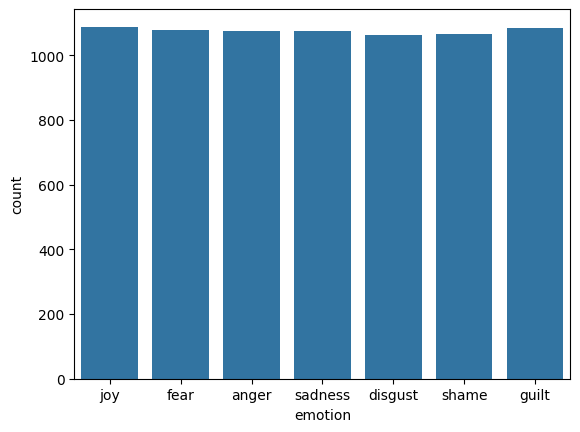

In [8]:
# Plot
sns.countplot(x='emotion',data=df)

---
# 3.0 Text preprocessing
- Lowercasing
- Expanding contractions
- Removing punctuation, special characters, digits
- Tokenization
- Handling negations
- POS tagging
- Stemming and Lemmatization
- Removing stopwords
- Data augmentation such as paraphrasing and synonym replacement
- Encoding such as one-hot or integer encoding

In [9]:
# Lowercase
df['text'] = df['text'].str.lower()

In [10]:
# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

df['text'] = df['text'].apply(expand_contractions)
df['text'][:5]

0    during the period of being in love, each time ...
1           when i was involved in a traffic accident.
2    it infuriated me when the motorist did not let...
3    when i lost the person who meant the most to me. 
4    the time i saw a deer knocked and the sight of...
Name: text, dtype: object

In [11]:
# Remove punctuation, special characters, digits, emojis, and extra whitespace
def clean_text(text):
    text = re.sub(r'[-—]', ' ', text) # Replace hyphens/dashes with spaces to avoid merged words
    
    text = text.encode('ascii', 'ignore').decode('ascii')  # Remove non-ASCII

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Keep only letters and spaces

    text = ' '.join(text.split())  # Clean whitespace
    return text

df['text'] = df['text'].apply(clean_text)

In [12]:
# Tokenization
df['tokens'] = df['text'].apply(word_tokenize)
df['tokens'][:5]

0    [during, the, period, of, being, in, love, eac...
1    [when, i, was, involved, in, a, traffic, accid...
2    [it, infuriated, me, when, the, motorist, did,...
3    [when, i, lost, the, person, who, meant, the, ...
4    [the, time, i, saw, a, deer, knocked, and, the...
Name: tokens, dtype: object

In [13]:
# Handle negations 
def handle_negations(tokens):
    negation_words = {"not", "no", "never", "n't", "neither", "nor"}
    new_tokens = []
    i = 0

    while i < len(tokens):
        if tokens[i] in negation_words and i + 1 < len(tokens):
            new_tokens.append(tokens[i] + "_" + tokens[i + 1])  # Merge negation with the next word
            i += 2 
        else:
            new_tokens.append(tokens[i])
            i += 1

    return new_tokens  

df['tokens'] = df['tokens'].apply(handle_negations)
df['tokens'][:5]

0    [during, the, period, of, being, in, love, eac...
1    [when, i, was, involved, in, a, traffic, accid...
2    [it, infuriated, me, when, the, motorist, did,...
3    [when, i, lost, the, person, who, meant, the, ...
4    [the, time, i, saw, a, deer, knocked, and, the...
Name: tokens, dtype: object

In [14]:
# Pos tagging
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()  
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN) 

In [15]:
# Stemming and Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

df['lemmatized'] = df['tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
)
df[['stemmed','lemmatized']][:5]

,stemmed,lemmatized
0,"[dure, the, period, of, be, in, love, each, ti...","[during, the, period, of, be, in, love, each, ..."
1,"[when, i, wa, involv, in, a, traffic, accid]","[when, i, be, involve, in, a, traffic, accident]"
2,"[it, infuri, me, when, the, motorist, did, not...","[it, infuriate, me, when, the, motorist, do, n..."
3,"[when, i, lost, the, person, who, meant, the, ...","[when, i, lose, the, person, who, meant, the, ..."
4,"[the, time, i, saw, a, deer, knock, and, the, ...","[the, time, i, saw, a, deer, knock, and, the, ..."


Lemmatized words are used for better accuracy and meaning matter.

- Lemmatization: Converts words to their base/dictionary form
- Stemming: Chops off word endings to get the root form

In [16]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['lemmatized'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df['filtered_tokens'][:5]

0    [period, love, time, met, especially, not_met,...
1                         [involve, traffic, accident]
2             [infuriate, motorist, not_let, overtake]
3                                [lose, person, meant]
4    [time, saw, deer, knock, sight, animal, injury...
Name: filtered_tokens, dtype: object

In [17]:
# Data augmentation: Synonym Replacement
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ")  
            if synonym.lower() != word.lower():  
                synonyms.add(synonym)
    return list(synonyms)

def synonym_replacement(tokens, n=1):
    new_tokens = tokens.copy()
    
    candidate_words = [word for word in tokens if get_synonyms(word)]
    if not candidate_words:
        return tokens  # No valid words to replace
    
    random.shuffle(candidate_words)  
    num_replaced = 0
    
    for word in candidate_words:
        synonyms = get_synonyms(word)
        if synonyms:
            synonym = random.choice(synonyms)  
            new_tokens = [synonym if w == word else w for w in new_tokens]
            num_replaced += 1
        if num_replaced >= n:
            break  
    
    return new_tokens

# Example of Synonym Replacement
df['augmented_tokens'] = df['filtered_tokens'].apply(lambda tokens: synonym_replacement(tokens, n=2))
df['augmented_tokens'][:5]

0    [period, honey, clip, met, especially, not_met...
1                            [affect, traffic, stroke]
2        [exasperate, automobilist, not_let, overtake]
3                            [miss, individual, meant]
4    [time, saw, cervid, roast, sight, animal, inju...
Name: augmented_tokens, dtype: object

In [18]:
# Encoding (One-hot and Integer Encoding)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['filtered_tokens'])

df['integer_encoded'] = tokenizer.texts_to_sequences(df['filtered_tokens'])
# df['one_hot_encoded'] = list(tokenizer.texts_to_matrix(df['augmented_tokens'], mode='binary'))

df.head()

,emotion,text,tokens,stemmed,lemmatized,filtered_tokens,augmented_tokens,integer_encoded
0,joy,during the period of being in love each time t...,"[during, the, period, of, being, in, love, eac...","[dure, the, period, of, be, in, love, each, ti...","[during, the, period, of, be, in, love, each, ...","[period, love, time, met, especially, not_met,...","[period, honey, clip, met, especially, not_met...","[424, 57, 6, 111, 449, 1935, 85, 6]"
1,fear,when i was involved in a traffic accident,"[when, i, was, involved, in, a, traffic, accid...","[when, i, wa, involv, in, a, traffic, accid]","[when, i, be, involve, in, a, traffic, accident]","[involve, traffic, accident]","[affect, traffic, stroke]","[311, 653, 123]"
2,anger,it infuriated me when the motorist did not let...,"[it, infuriated, me, when, the, motorist, did,...","[it, infuri, me, when, the, motorist, did, not...","[it, infuriate, me, when, the, motorist, do, n...","[infuriate, motorist, not_let, overtake]","[exasperate, automobilist, not_let, overtake]","[3893, 3894, 843, 1513]"
3,sadness,when i lost the person who meant the most to me,"[when, i, lost, the, person, who, meant, the, ...","[when, i, lost, the, person, who, meant, the, ...","[when, i, lose, the, person, who, meant, the, ...","[lose, person, meant]","[miss, individual, meant]","[88, 19, 684]"
4,disgust,the time i saw a deer knocked and the sight of...,"[the, time, i, saw, a, deer, knocked, and, the...","[the, time, i, saw, a, deer, knock, and, the, ...","[the, time, i, saw, a, deer, knock, and, the, ...","[time, saw, deer, knock, sight, animal, injury...","[time, saw, cervid, roast, sight, animal, inju...","[6, 21, 2301, 370, 1089, 542, 1689, 2302, 10, ..."


---
# 4.0 Data splitting
- 80% Train set
- 10% Test set
- 10% Validation set

In [44]:
# Split data using processed tokens
X_train, X_temp, y_train, y_temp = train_test_split(
    df['filtered_tokens'], df['emotion'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [45]:
# Perform data augmentation (synonym augmentation) on training set
X_augmented_train = X_train.apply(lambda tokens: synonym_replacement(tokens, n=2))
X_augmented_train = pd.concat([X_train, X_augmented_train]).sample(frac=1, random_state=42).reset_index(drop=True)
y_train_concat = pd.concat([y_train, y_train]).sample(frac=1, random_state=42).reset_index(drop=True)

In [48]:
# Calculate class weights before model training to check the classes distribution
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict


{0: 1.0038339723287215,
 1: 1.016886187098953,
 2: 1.0085412828671914,
 3: 1.0132929496887093,
 4: 0.9590699155916548,
 5: 1.0038339723287215,
 6: 0.9968548253600398}

---
# 5.0 Feature Extraction
- Bag of Words
- TF-IDF
- N-gram
- Word Embeddings such as Word2Vec, FastText

### 5.1 Traditional Feature Extraction

In [49]:
# Convert tokens back to text for BoW, TF-IDF, and N-grams
X_train_texts = [' '.join(tokens) for tokens in X_augmented_train]
X_val_texts = [' '.join(tokens) for tokens in X_val]
X_test_texts = [' '.join(tokens) for tokens in X_test]

In [50]:
# Function to plot WordCloud
def plot_word_cloud(feature_names, feature_scores, title):
    # Create a dictionary for word frequencies
    word_freq = dict(zip(feature_names, feature_scores))
    
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq) # Generate WordCloud
    
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

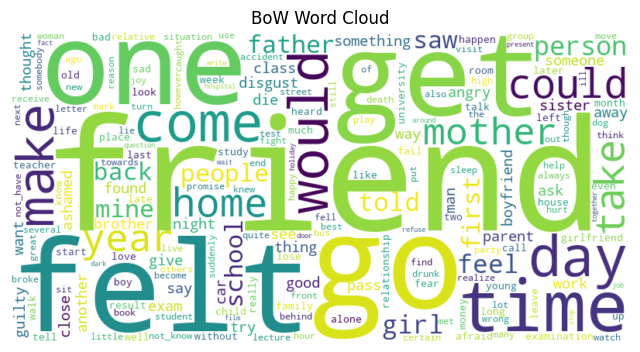

In [51]:
# Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train_texts)
X_val_bow = bow_vectorizer.transform(X_val_texts)
X_test_bow = bow_vectorizer.transform(X_test_texts)

# Visualizing BoW using Word Cloud
bow_feature_names = bow_vectorizer.get_feature_names_out()
bow_scores = X_train_bow.toarray().sum(axis=0)  # Word frequency

plot_word_cloud(bow_feature_names, bow_scores, title="BoW Word Cloud")

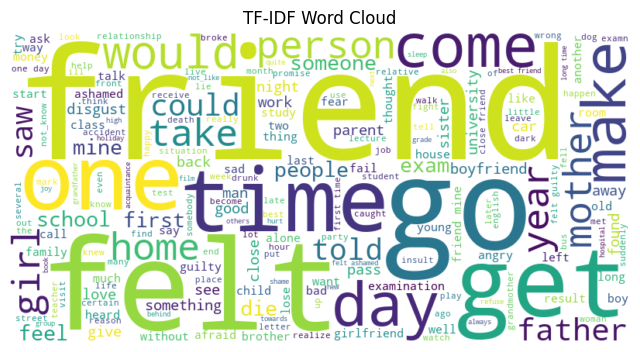

In [52]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))  # Unigrams and bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_texts)
X_val_tfidf = tfidf_vectorizer.transform(X_val_texts)
X_test_tfidf = tfidf_vectorizer.transform(X_test_texts)

# Visualizing TF-IDF using Word Cloud
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_train_tfidf.mean(axis=0)).flatten()

plot_word_cloud(tfidf_feature_names, tfidf_scores, title="TF-IDF Word Cloud")

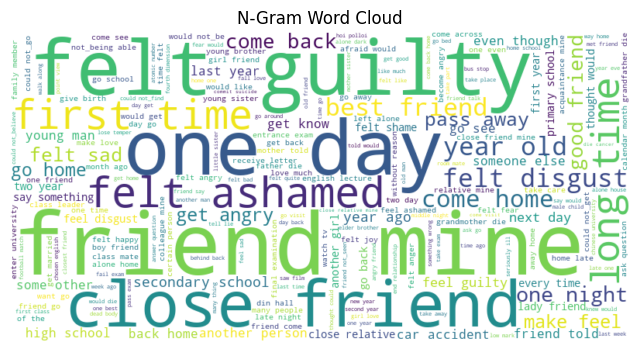

In [53]:
# BoW with N-grams (Bi-grams & Tri-grams)
ngram_vectorizer = CountVectorizer(ngram_range=(2,3))
X_train_ngram = ngram_vectorizer.fit_transform(X_train_texts)
X_val_ngram = ngram_vectorizer.transform(X_val_texts)
X_test_ngram = ngram_vectorizer.transform(X_test_texts)

# Visualizing N-grams using Word Cloud
ngram_feature_names = ngram_vectorizer.get_feature_names_out()
ngram_scores = np.array(X_train_ngram.sum(axis=0)).flatten() # Word frequency

plot_word_cloud(ngram_feature_names, ngram_scores, title="N-Gram Word Cloud")

### 5.2 Pretrained Word Embeddings

In [27]:
# Function to plot PCA and t-SNE Visualization for word embeddings
def visualize_embeddings(embedding_model, method, num_words=30, title_suffix=""):
    # Get vocabulary and word vectors
    vocab = list(embedding_model.wv.index_to_key)  
    words = vocab[:num_words]  # Select first `num_words` words

    word_vectors = np.array([embedding_model.wv[word] for word in words])

    if method == "pca":
        reducer = PCA(n_components=2)
        title = f"PCA Visualization of Word Embeddings {title_suffix}"
    elif method == "tsne":
        reducer = TSNE(n_components=2, perplexity=10, random_state=42)
        title = f"t-SNE Visualization of Word Embeddings {title_suffix}"

    reduced_vectors = reducer.fit_transform(word_vectors)

    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)

    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

In [28]:
# Word Embeddings: Word2Vec using pre-trained Google News vectors
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

# w2v_model = Word2Vec(sentences=X_augmented_train.tolist(), vector_size=100, window=5, min_count=1, workers=4)
# word_vectors = w2v_model.wv  # Get word vectors

# Visualizing Word2Vec using PCA and t-SNE
# visualize_embeddings(w2v_model, method="pca", num_words=30)
# visualize_embeddings(w2v_model, method="tsne", num_words=30)

In [29]:
# Word Embeddings: FastText using English pre-trained FastText (300d)
fasttext_vectors = gensim.downloader.load('fasttext-wiki-news-subwords-300')

# fasttext_model = FastText(sentences=X_augmented_train.tolist(), vector_size=100, window=5, min_count=1, workers=4)
# fasttext_vectors = fasttext_model.wv  # Get word vectors

# Visualizing FastText using PCA and t-SNE
# visualize_embeddings(fasttext_model, method="pca", num_words=30)
# visualize_embeddings(fasttext_model, method="tsne", num_words=30)

---
# 6.0 Models Development
## 6.1 Machine Learning models
- Naive Bayes
- Support Vector Machine (SVM)

In [58]:
# Function to train and evaluate Machine Learning model with or without hyperparameter tuning (GridSearch CV)
def train_ML_model(model, X_train, X_val, y_train, y_val, model_name, param_grid=None):
    if param_grid:
        print(f"=== {model_name} with Hyperparameter Tuning (GridSearch CV) ===")
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    else:
        print(f"=== {model_name} without Hyperparameter Tuning ===")
        model.fit(X_train, y_train)

    # Predict on validation data
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} - Validation Accuracy: {accuracy:.4f}")
    print(f"Classification Report ({model_name}):\n", classification_report(y_val, y_pred))

    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return model


### 6.1.1 Naive Bayes

=== BoW Naive Bayes without Hyperparameter Tuning ===
BoW Naive Bayes - Validation Accuracy: 0.5657
Classification Report (BoW Naive Bayes):
               precision    recall  f1-score   support

       anger       0.58      0.59      0.58       111
     disgust       0.56      0.50      0.53       107
        fear       0.47      0.47      0.47       121
       guilt       0.75      0.66      0.70       125
         joy       0.60      0.68      0.64        94
     sadness       0.60      0.56      0.58        98
       shame       0.43      0.51      0.46        97

    accuracy                           0.57       753
   macro avg       0.57      0.57      0.57       753
weighted avg       0.57      0.57      0.57       753



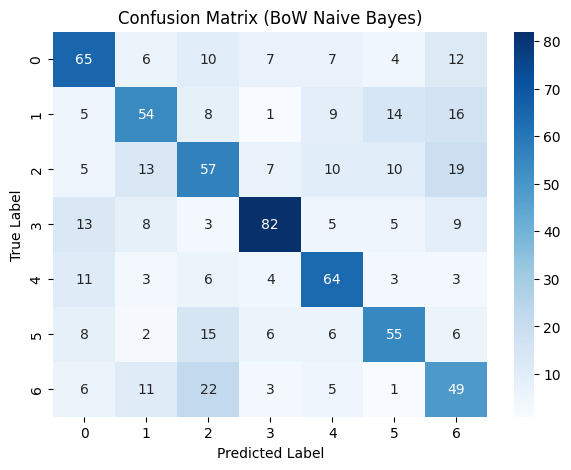

=== TF-IDF Naive Bayes without Hyperparameter Tuning ===
TF-IDF Naive Bayes - Validation Accuracy: 0.5538
Classification Report (TF-IDF Naive Bayes):
               precision    recall  f1-score   support

       anger       0.57      0.63      0.60       111
     disgust       0.52      0.45      0.48       107
        fear       0.45      0.40      0.42       121
       guilt       0.76      0.70      0.72       125
         joy       0.54      0.68      0.60        94
     sadness       0.62      0.52      0.57        98
       shame       0.42      0.49      0.46        97

    accuracy                           0.55       753
   macro avg       0.55      0.55      0.55       753
weighted avg       0.56      0.55      0.55       753



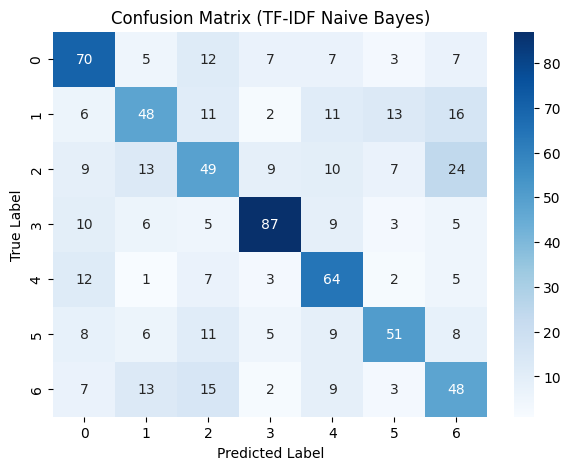

=== N-Gram Naive Bayes without Hyperparameter Tuning ===
N-Gram Naive Bayes - Validation Accuracy: 0.4064
Classification Report (N-Gram Naive Bayes):
               precision    recall  f1-score   support

       anger       0.51      0.53      0.52       111
     disgust       0.39      0.31      0.34       107
        fear       0.38      0.25      0.30       121
       guilt       0.54      0.55      0.55       125
         joy       0.29      0.57      0.39        94
     sadness       0.37      0.33      0.35        98
       shame       0.38      0.30      0.34        97

    accuracy                           0.41       753
   macro avg       0.41      0.41      0.40       753
weighted avg       0.42      0.41      0.40       753



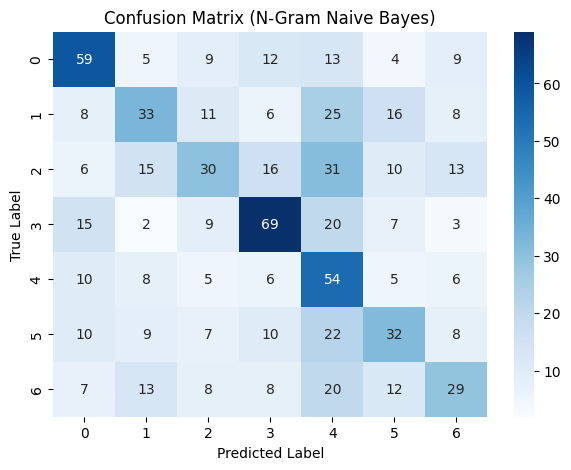

In [59]:
# Naive Bayes model
nb_model = MultinomialNB()

#  Train and evaluate Naive Bayes model without tuning
nb_bow = train_ML_model(nb_model, X_train_bow, X_val_bow, y_train_concat, y_val, model_name="BoW Naive Bayes")
nb_tfidf = train_ML_model(nb_model, X_train_tfidf, X_val_tfidf, y_train_concat, y_val, model_name="TF-IDF Naive Bayes")
nb_ngram = train_ML_model(nb_model, X_train_ngram, X_val_ngram, y_train_concat, y_val, model_name="N-Gram Naive Bayes")

=== Tuned BoW Naive Bayes with Hyperparameter Tuning (GridSearch CV) ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Tuned BoW Naive Bayes: {'alpha': 0.1, 'fit_prior': False}
Best Cross-Validation Accuracy: 0.6653
Tuned BoW Naive Bayes - Validation Accuracy: 0.5325
Classification Report (Tuned BoW Naive Bayes):
               precision    recall  f1-score   support

       anger       0.55      0.57      0.56       111
     disgust       0.52      0.48      0.50       107
        fear       0.43      0.45      0.44       121
       guilt       0.77      0.66      0.71       125
         joy       0.56      0.62      0.59        94
     sadness       0.56      0.51      0.53        98
       shame       0.38      0.43      0.40        97

    accuracy                           0.53       753
   macro avg       0.54      0.53      0.53       753
weighted avg       0.54      0.53      0.54       753



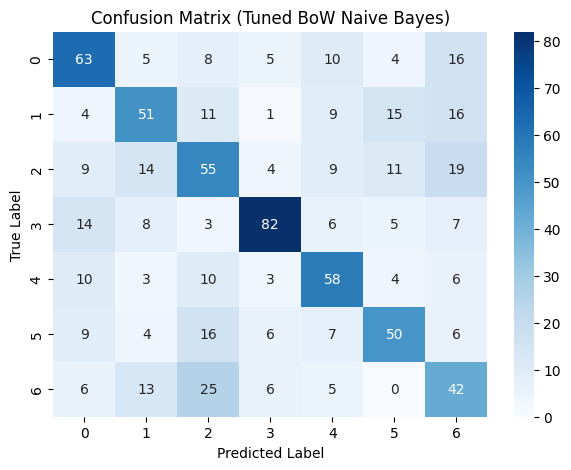

=== Tuned TF-IDF Naive Bayes with Hyperparameter Tuning (GridSearch CV) ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Tuned TF-IDF Naive Bayes: {'alpha': 0.01, 'fit_prior': False}
Best Cross-Validation Accuracy: 0.8007
Tuned TF-IDF Naive Bayes - Validation Accuracy: 0.5007
Classification Report (Tuned TF-IDF Naive Bayes):
               precision    recall  f1-score   support

       anger       0.58      0.56      0.57       111
     disgust       0.44      0.43      0.43       107
        fear       0.39      0.39      0.39       121
       guilt       0.72      0.65      0.68       125
         joy       0.56      0.60      0.58        94
     sadness       0.45      0.48      0.47        98
       shame       0.37      0.39      0.38        97

    accuracy                           0.50       753
   macro avg       0.50      0.50      0.50       753
weighted avg       0.51      0.50      0.50       753



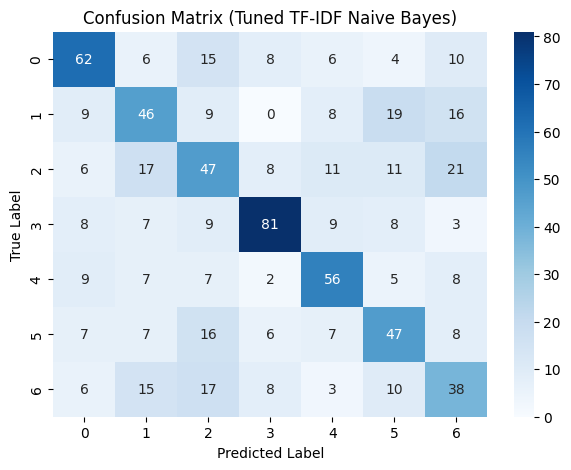

=== Tuned N-Gram Naive Bayes with Hyperparameter Tuning (GridSearch CV) ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Tuned N-Gram Naive Bayes: {'alpha': 0.01, 'fit_prior': True}
Best Cross-Validation Accuracy: 0.7563
Tuned N-Gram Naive Bayes - Validation Accuracy: 0.3878
Classification Report (Tuned N-Gram Naive Bayes):
               precision    recall  f1-score   support

       anger       0.48      0.49      0.48       111
     disgust       0.37      0.34      0.35       107
        fear       0.34      0.21      0.26       121
       guilt       0.53      0.54      0.54       125
         joy       0.30      0.56      0.39        94
     sadness       0.33      0.28      0.30        98
       shame       0.35      0.29      0.32        97

    accuracy                           0.39       753
   macro avg       0.39      0.39      0.38       753
weighted avg       0.39      0.39      0.38       753



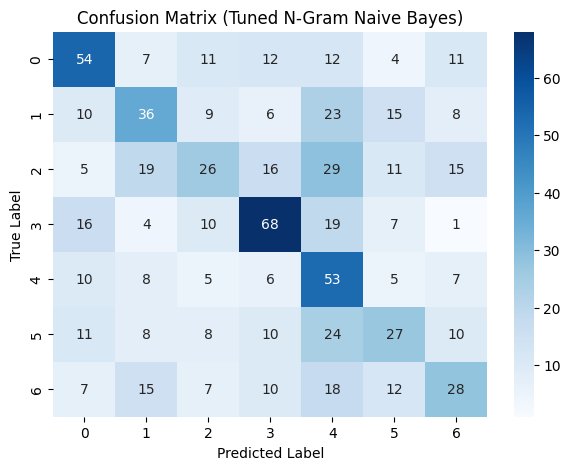

In [60]:
# Train and evaluate Naive Bayes model with hyperparameter tuning (GridSearch CV)
nb_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0], # Smoothing parameter
    'fit_prior': [True, False] # Whether to learn class prior probabilities
}

tuned_nb_bow = train_ML_model(nb_model, X_train_bow, X_val_bow, y_train_concat, y_val, model_name="Tuned BoW Naive Bayes", param_grid=nb_param_grid)
tuned_nb_tfidf = train_ML_model(nb_model, X_train_tfidf, X_val_tfidf, y_train_concat, y_val, model_name="Tuned TF-IDF Naive Bayes", param_grid=nb_param_grid)
tuned_nb_ngram = train_ML_model(nb_model, X_train_ngram, X_val_ngram, y_train_concat, y_val, model_name="Tuned N-Gram Naive Bayes", param_grid=nb_param_grid)

### 6.1.2 Support Vector Machine (SVM)

=== BoW SVM without Hyperparameter Tuning ===
BoW SVM - Validation Accuracy: 0.5498
Classification Report (BoW SVM):
               precision    recall  f1-score   support

       anger       0.64      0.60      0.62       111
     disgust       0.48      0.45      0.46       107
        fear       0.40      0.47      0.44       121
       guilt       0.67      0.73      0.70       125
         joy       0.65      0.59      0.61        94
     sadness       0.61      0.55      0.58        98
       shame       0.42      0.43      0.43        97

    accuracy                           0.55       753
   macro avg       0.55      0.55      0.55       753
weighted avg       0.55      0.55      0.55       753



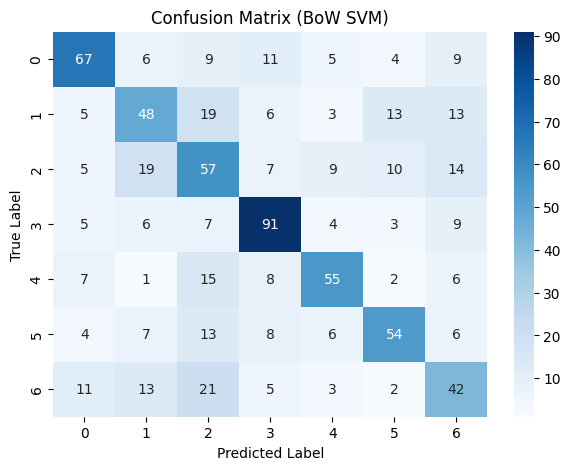

=== TF-IDF SVM without Hyperparameter Tuning ===
TF-IDF SVM - Validation Accuracy: 0.5710
Classification Report (TF-IDF SVM):
               precision    recall  f1-score   support

       anger       0.64      0.59      0.62       111
     disgust       0.54      0.47      0.50       107
        fear       0.45      0.47      0.46       121
       guilt       0.70      0.74      0.72       125
         joy       0.61      0.63      0.62        94
     sadness       0.58      0.61      0.59        98
       shame       0.46      0.47      0.46        97

    accuracy                           0.57       753
   macro avg       0.57      0.57      0.57       753
weighted avg       0.57      0.57      0.57       753



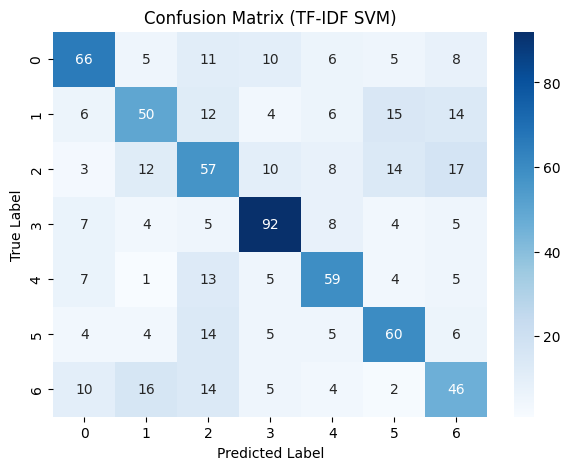

=== N-Gram SVM without Hyperparameter Tuning ===
N-Gram SVM - Validation Accuracy: 0.2895
Classification Report (N-Gram SVM):
               precision    recall  f1-score   support

       anger       0.41      0.47      0.44       111
     disgust       0.74      0.13      0.22       107
        fear       1.00      0.05      0.09       121
       guilt       0.20      0.90      0.33       125
         joy       0.42      0.05      0.09        94
     sadness       0.86      0.12      0.21        98
       shame       0.89      0.18      0.29        97

    accuracy                           0.29       753
   macro avg       0.65      0.27      0.24       753
weighted avg       0.64      0.29      0.24       753



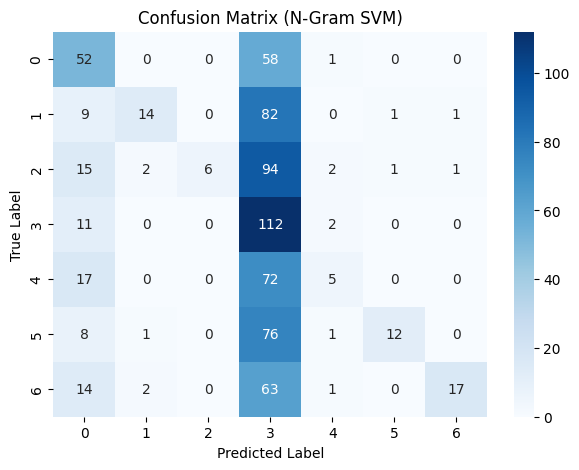

In [ ]:
# Support Vector Machine (SVM) model
svm_model = SVC()

# Train and evaluate SVM model without tuning
svm_bow = train_ML_model(svm_model, X_train_bow, X_val_bow, y_train_concat, y_val, model_name="BoW SVM")
svm_tfidf = train_ML_model(svm_model, X_train_tfidf, X_val_tfidf, y_train_concat, y_val, model_name="TF-IDF SVM")
svm_ngram = train_ML_model(svm_model, X_train_ngram, X_val_ngram, y_train_concat, y_val, model_name="N-Gram SVM")

=== Tuned BoW SVM with Hyperparameter Tuning (GridSearch CV) ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Tuned BoW SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.7286
Tuned BoW SVM - Validation Accuracy: 0.4502
Classification Report (Tuned BoW SVM):
               precision    recall  f1-score   support

       anger       0.32      0.71      0.45       111
     disgust       0.47      0.34      0.39       107
        fear       0.51      0.16      0.24       121
       guilt       0.48      0.74      0.58       125
         joy       0.66      0.47      0.55        94
     sadness       0.57      0.47      0.51        98
       shame       0.41      0.24      0.30        97

    accuracy                           0.45       753
   macro avg       0.49      0.45      0.43       753
weighted avg       0.49      0.45      0.43       753



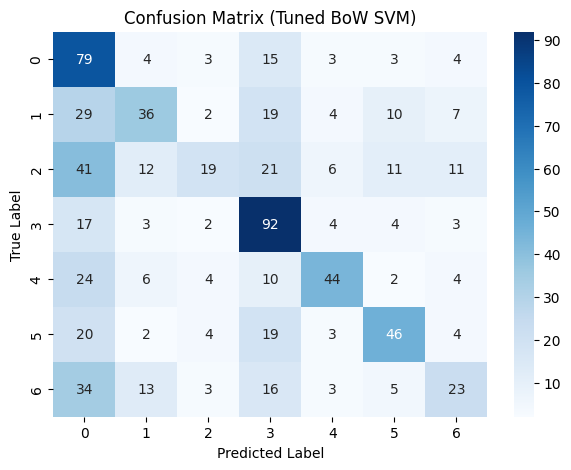

=== Tuned TF-IDF SVM with Hyperparameter Tuning (GridSearch CV) ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Tuned TF-IDF SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.8205
Tuned TF-IDF SVM - Validation Accuracy: 0.5365
Classification Report (Tuned TF-IDF SVM):
               precision    recall  f1-score   support

       anger       0.60      0.64      0.62       111
     disgust       0.45      0.43      0.44       107
        fear       0.39      0.41      0.40       121
       guilt       0.70      0.72      0.71       125
         joy       0.66      0.61      0.63        94
     sadness       0.57      0.53      0.55        98
       shame       0.39      0.39      0.39        97

    accuracy                           0.54       753
   macro avg       0.54      0.53      0.53       753
weighted avg       0.54      0.54      0.54       753



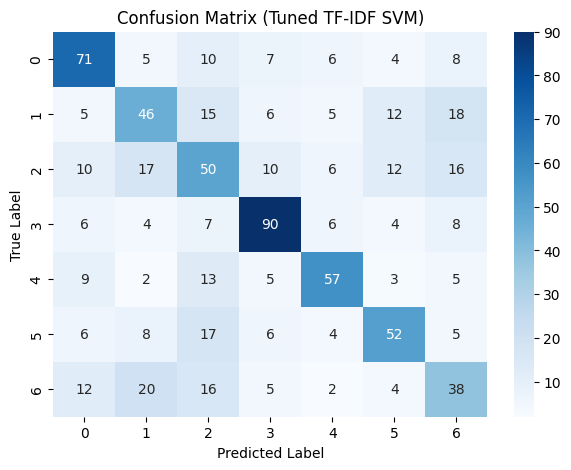

=== Tuned N-Gram SVM with Hyperparameter Tuning (GridSearch CV) ===
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Tuned N-Gram SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7435
Tuned N-Gram SVM - Validation Accuracy: 0.3851
Classification Report (Tuned N-Gram SVM):
               precision    recall  f1-score   support

       anger       0.50      0.50      0.50       111
     disgust       0.42      0.32      0.36       107
        fear       0.49      0.19      0.27       121
       guilt       0.29      0.72      0.41       125
         joy       0.44      0.34      0.38        94
     sadness       0.41      0.30      0.34        98
       shame       0.46      0.27      0.34        97

    accuracy                           0.39       753
   macro avg       0.43      0.38      0.37       753
weighted avg       0.43      0.39      0.37       753



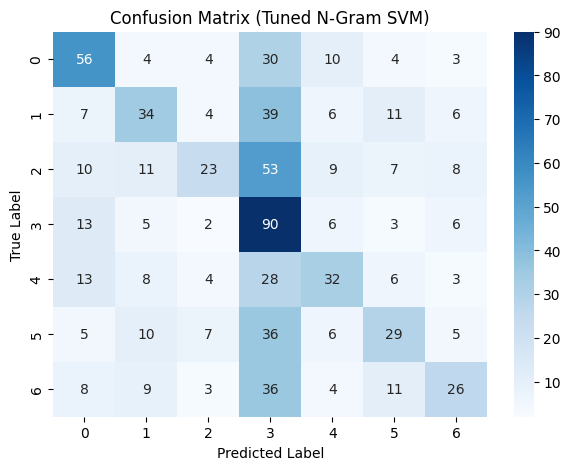

In [ ]:
# Train and evaluate SVM model with hyperparameter tuning (GridSearch CV)
svm_param_grid = {
    'C': [0.1, 1, 10], # Regularization parameter 
    'kernel': ['linear', 'poly'], # Kernel type
    'gamma': ['scale', 'auto']
}

tuned_svm_bow = train_ML_model(svm_model, X_train_bow, X_val_bow, y_train_concat, y_val, model_name="Tuned BoW SVM", param_grid=svm_param_grid)
tuned_svm_tfidf = train_ML_model(svm_model, X_train_tfidf, X_val_tfidf, y_train_concat, y_val, model_name="Tuned TF-IDF SVM", param_grid=svm_param_grid)
tuned_svm_ngram = train_ML_model(svm_model, X_train_ngram, X_val_ngram, y_train_concat, y_val, model_name="Tuned N-Gram SVM", param_grid=svm_param_grid)


## 6.2 Deep Learning models
- CNN
- RNN
- BiLSTM


In [ ]:
# Encoding labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_concat)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [ ]:
# Tokenization and padding for deep learning models
max_words = 10000  # Maximum vocabulary size
max_len = 100     # Maximum length of input sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_augmented_train)

X_train_seq = tokenizer.texts_to_sequences(X_augmented_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [37]:
# Function to create embedding matrix
def create_embedding_matrix(word_index, embedding_vectors):
    embedding_dim = 300  # Match pre-trained dimension
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    
    for word, i in word_index.items():
        if word in embedding_vectors:
            embedding_matrix[i] = embedding_vectors[word]
        else:
            # Enhanced OOV handling with smaller random initialization
            embedding_matrix[i] = np.random.normal(
                loc=0.0, 
                scale=0.6, 
                size=(embedding_dim,)
            )
    return embedding_matrix


# Preparing the embedding matrices
embedding_matrix_w2v = create_embedding_matrix(tokenizer.word_index, w2v_vectors)
embedding_matrix_ft = create_embedding_matrix(tokenizer.word_index, fasttext_vectors)

In [38]:
# Function to train and evaluate deep learning models
def train_DL_model(model, X_train, y_train, X_val, y_val, model_name, epochs=10, batch_size=32, callbacks=None):
    # Train model with error handling for callbacks
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=2,
        callbacks=callbacks if callbacks else []
    )

    # Plotting 
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluation 
    y_pred = np.argmax(model.predict(X_val), axis=1)
    accuracy = accuracy_score(y_val, y_pred)
    print(f'{model_name} - Validation Accuracy: {accuracy:.4f}')
    print(f'Classification Report ({model_name}):\n', classification_report(y_val, y_pred))

    # Confusion Matrix 
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return history 

### 6.2.1 CNN

In [39]:
# CNN model 
def cnn_model(embedding_matrix, word_index, embedding_dim=100):
    model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, 
                  weights=[embedding_matrix], input_length=max_len, trainable=True),
        Conv1D(256, 5, activation='relu'),  
        Conv1D(128, 3, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(set(y_train)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


=== Training CNN with Word2Vec Embeddings===
Epoch 1/10
377/377 - 19s - 51ms/step - accuracy: 0.2321 - loss: 1.8697 - val_accuracy: 0.4993 - val_loss: 1.4852
Epoch 2/10
377/377 - 15s - 39ms/step - accuracy: 0.5008 - loss: 1.3881 - val_accuracy: 0.5644 - val_loss: 1.2828
Epoch 3/10
377/377 - 15s - 39ms/step - accuracy: 0.6661 - loss: 0.9887 - val_accuracy: 0.5538 - val_loss: 1.3634
Epoch 4/10
377/377 - 15s - 39ms/step - accuracy: 0.7757 - loss: 0.7014 - val_accuracy: 0.5591 - val_loss: 1.4751
Epoch 5/10
377/377 - 15s - 39ms/step - accuracy: 0.8427 - loss: 0.5025 - val_accuracy: 0.5378 - val_loss: 1.7249
Epoch 6/10
377/377 - 15s - 39ms/step - accuracy: 0.8882 - loss: 0.3638 - val_accuracy: 0.5259 - val_loss: 2.0732
Epoch 7/10
377/377 - 15s - 39ms/step - accuracy: 0.9106 - loss: 0.2887 - val_accuracy: 0.5179 - val_loss: 2.4374
Epoch 8/10
377/377 - 15s - 39ms/step - accuracy: 0.9305 - loss: 0.2440 - val_accuracy: 0.5259 - val_loss: 2.3899
Epoch 9/10
377/377 - 15s - 40ms/step - accuracy: 0.

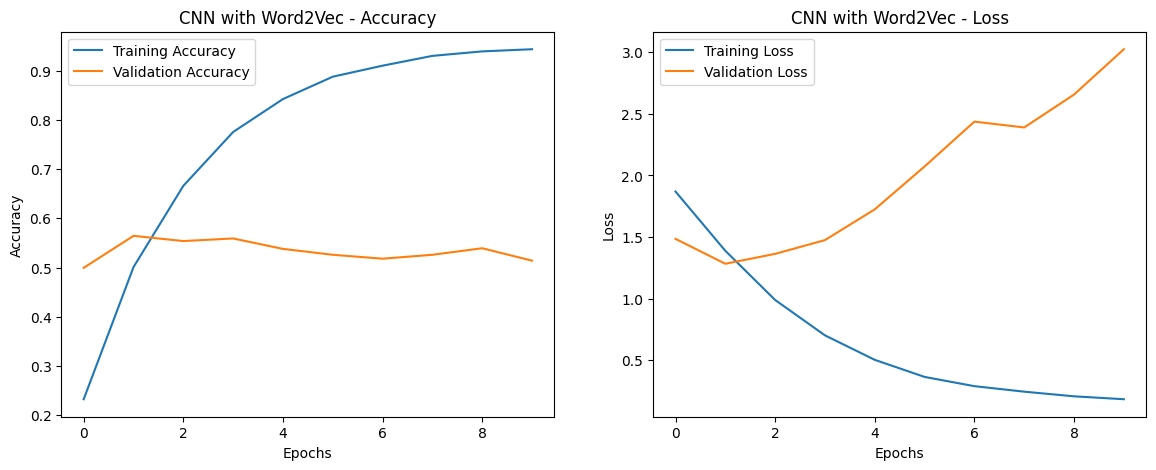

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN with Word2Vec - Validation Accuracy: 0.5139
Classification Report (CNN with Word2Vec):
               precision    recall  f1-score   support

           0       0.63      0.51      0.56       111
           1       0.45      0.45      0.45       107
           2       0.40      0.33      0.36       121
           3       0.64      0.75      0.69       125
           4       0.52      0.60      0.56        94
           5       0.52      0.54      0.53        98
           6       0.38      0.40      0.39        97

    accuracy                           0.51       753
   macro avg       0.51      0.51      0.51       753
weighted avg       0.51      0.51      0.51       753



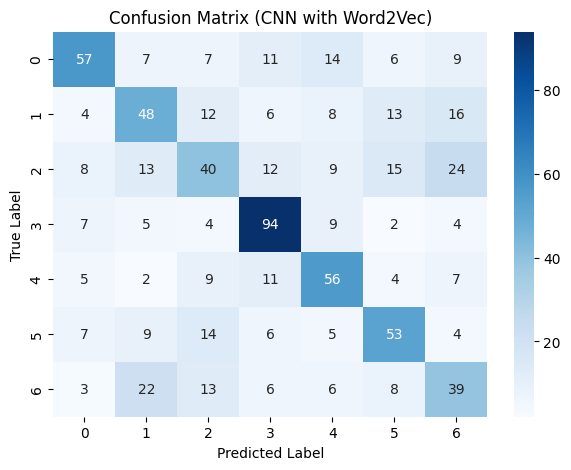

In [40]:
# Training and evaluating CNN with Word2Vec embeddings
print('=== Training CNN with Word2Vec Embeddings===')
cnn_w2v = cnn_model(embedding_matrix_w2v, tokenizer.word_index, embedding_dim=300)
train_DL_model(cnn_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="CNN with Word2Vec")

=== Training CNN with FastText Embeddings===
Epoch 1/10
377/377 - 17s - 45ms/step - accuracy: 0.1671 - loss: 1.9447 - val_accuracy: 0.2895 - val_loss: 1.9015
Epoch 2/10
377/377 - 15s - 41ms/step - accuracy: 0.3514 - loss: 1.6826 - val_accuracy: 0.4900 - val_loss: 1.4347
Epoch 3/10
377/377 - 15s - 40ms/step - accuracy: 0.5719 - loss: 1.2034 - val_accuracy: 0.5365 - val_loss: 1.3450
Epoch 4/10
377/377 - 15s - 40ms/step - accuracy: 0.7207 - loss: 0.8554 - val_accuracy: 0.5272 - val_loss: 1.4594
Epoch 5/10
377/377 - 15s - 40ms/step - accuracy: 0.8057 - loss: 0.6171 - val_accuracy: 0.5339 - val_loss: 1.6700
Epoch 6/10
377/377 - 15s - 40ms/step - accuracy: 0.8595 - loss: 0.4568 - val_accuracy: 0.4980 - val_loss: 1.9561
Epoch 7/10
377/377 - 15s - 41ms/step - accuracy: 0.8875 - loss: 0.3597 - val_accuracy: 0.5193 - val_loss: 2.3012
Epoch 8/10
377/377 - 15s - 40ms/step - accuracy: 0.9099 - loss: 0.2937 - val_accuracy: 0.5232 - val_loss: 2.5104
Epoch 9/10
377/377 - 15s - 40ms/step - accuracy: 0.

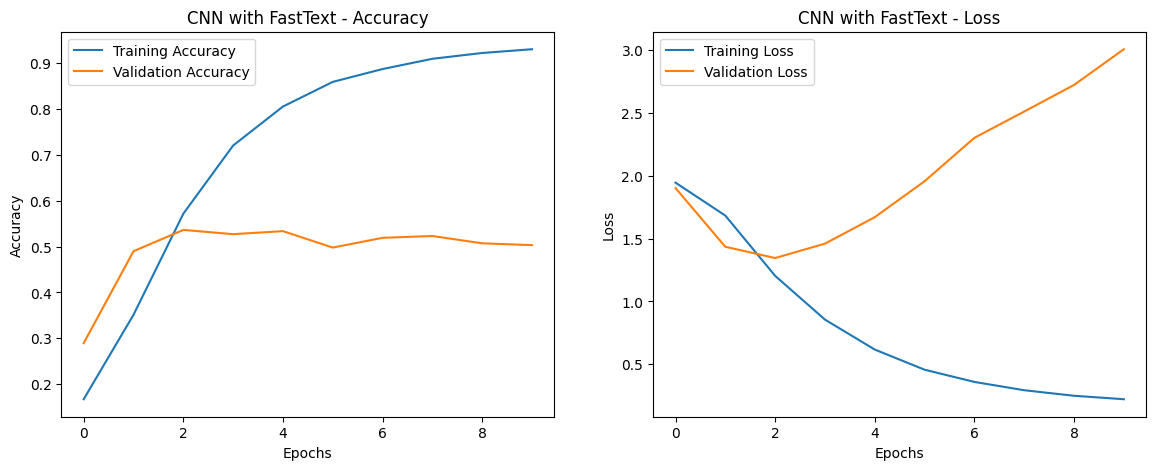

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
CNN with FastText - Validation Accuracy: 0.5033
Classification Report (CNN with FastText):
               precision    recall  f1-score   support

           0       0.57      0.51      0.54       111
           1       0.50      0.46      0.48       107
           2       0.46      0.31      0.37       121
           3       0.66      0.68      0.67       125
           4       0.46      0.66      0.54        94
           5       0.46      0.57      0.51        98
           6       0.36      0.33      0.34        97

    accuracy                           0.50       753
   macro avg       0.50      0.50      0.49       753
weighted avg       0.50      0.50      0.50       753



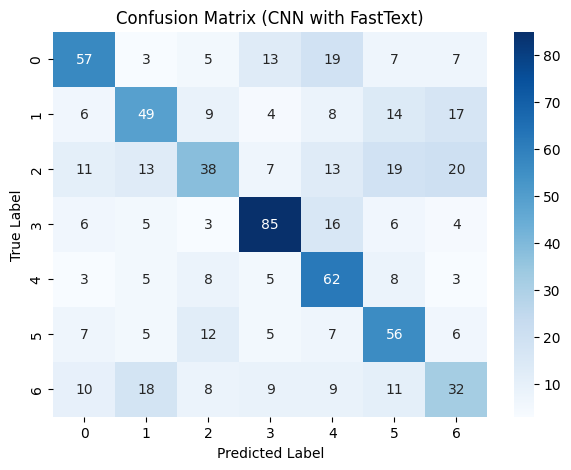

In [41]:
# Training and evaluating CNN with FastText embeddings
print('=== Training CNN with FastText Embeddings===')
cnn_ft = cnn_model(embedding_matrix_ft, tokenizer.word_index, embedding_dim=300)
train_DL_model(cnn_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="CNN with FastText")

### 6.2.2 RNN

In [42]:
# RNN model
def rnn_model(embedding_matrix, word_index, embedding_dim=100):
    model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                  weights=[embedding_matrix], input_length=max_len, trainable=True),
        SimpleRNN(128, return_sequences=True, activation='relu'),
        Dropout(0.5),
        SimpleRNN(64, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(len(set(y_train)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


=== Training RNN with Word2Vec Embeddings ===
Epoch 1/10
377/377 - 16s - 41ms/step - accuracy: 0.1498 - loss: 1.9714 - val_accuracy: 0.1726 - val_loss: 1.9432
Epoch 2/10
377/377 - 12s - 32ms/step - accuracy: 0.1666 - loss: 1.9413 - val_accuracy: 0.2151 - val_loss: 1.9194
Epoch 3/10
377/377 - 12s - 32ms/step - accuracy: 0.2211 - loss: 1.8847 - val_accuracy: 0.3572 - val_loss: 1.7080
Epoch 4/10
377/377 - 12s - 32ms/step - accuracy: 0.3596 - loss: 1.6484 - val_accuracy: 0.4382 - val_loss: 1.4721
Epoch 5/10
377/377 - 12s - 32ms/step - accuracy: 0.5042 - loss: 1.3419 - val_accuracy: 0.5007 - val_loss: 1.4262
Epoch 6/10
377/377 - 12s - 32ms/step - accuracy: 0.6065 - loss: 1.0986 - val_accuracy: 0.4821 - val_loss: 1.5649
Epoch 7/10
377/377 - 12s - 32ms/step - accuracy: 0.6760 - loss: 0.9075 - val_accuracy: 0.5007 - val_loss: 1.7492
Epoch 8/10
377/377 - 12s - 32ms/step - accuracy: 0.7318 - loss: 0.7640 - val_accuracy: 0.4874 - val_loss: 1.6895
Epoch 9/10
377/377 - 12s - 32ms/step - accuracy: 0

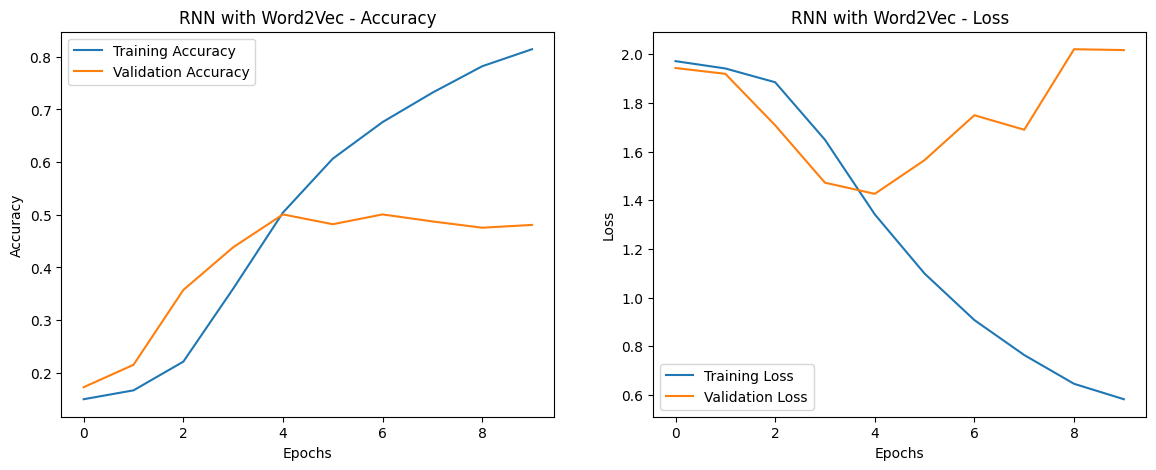

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
RNN with Word2Vec - Validation Accuracy: 0.4807
Classification Report (RNN with Word2Vec):
               precision    recall  f1-score   support

           0       0.57      0.54      0.56       111
           1       0.44      0.49      0.46       107
           2       0.29      0.32      0.30       121
           3       0.60      0.69      0.64       125
           4       0.61      0.49      0.54        94
           5       0.53      0.43      0.47        98
           6       0.38      0.38      0.38        97

    accuracy                           0.48       753
   macro avg       0.49      0.48      0.48       753
weighted avg       0.49      0.48      0.48       753



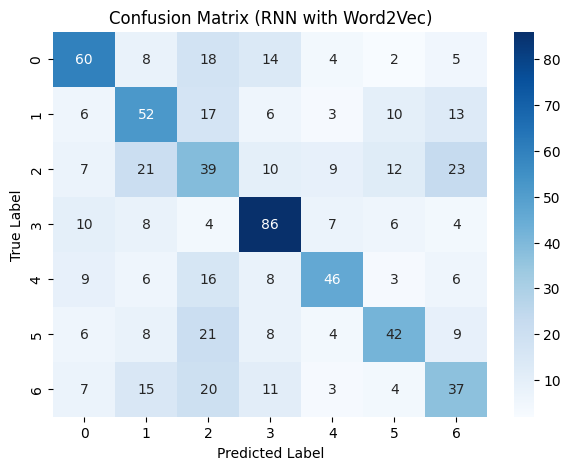

In [43]:
# Training and evaluating RNN with Word2Vec embeddings
print('=== Training RNN with Word2Vec Embeddings ===')
rnn_w2v = rnn_model(embedding_matrix_w2v, tokenizer.word_index, embedding_dim=300)
train_DL_model(rnn_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="RNN with Word2Vec")

=== Training RNN with FastText Embeddings ===
Epoch 1/10
377/377 - 14s - 38ms/step - accuracy: 0.1475 - loss: 1.9628 - val_accuracy: 0.1394 - val_loss: 1.9433
Epoch 2/10
377/377 - 12s - 32ms/step - accuracy: 0.1763 - loss: 1.9407 - val_accuracy: 0.1979 - val_loss: 1.9234
Epoch 3/10
377/377 - 12s - 32ms/step - accuracy: 0.2444 - loss: 1.8480 - val_accuracy: 0.3373 - val_loss: 1.7120
Epoch 4/10
377/377 - 12s - 32ms/step - accuracy: 0.3820 - loss: 1.5798 - val_accuracy: 0.4462 - val_loss: 1.5112
Epoch 5/10
377/377 - 12s - 32ms/step - accuracy: 0.5197 - loss: 1.2782 - val_accuracy: 0.4688 - val_loss: 1.5083
Epoch 6/10
377/377 - 13s - 33ms/step - accuracy: 0.6285 - loss: 1.0278 - val_accuracy: 0.4954 - val_loss: 1.6165
Epoch 7/10
377/377 - 13s - 35ms/step - accuracy: 0.7036 - loss: 0.8378 - val_accuracy: 0.4754 - val_loss: 1.7405
Epoch 8/10
377/377 - 13s - 33ms/step - accuracy: 0.7513 - loss: 0.7040 - val_accuracy: 0.5020 - val_loss: 1.8789
Epoch 9/10
377/377 - 13s - 34ms/step - accuracy: 0

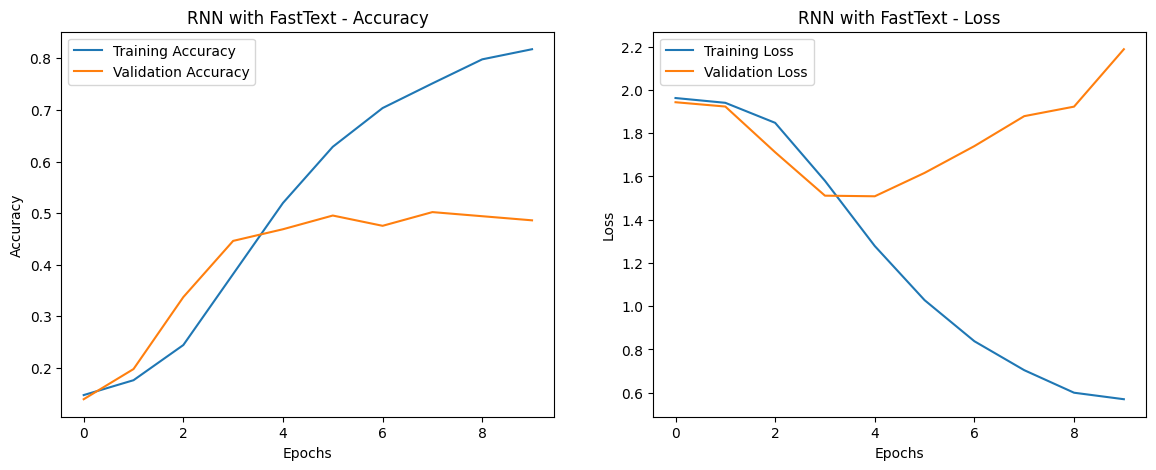

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
RNN with FastText - Validation Accuracy: 0.4861
Classification Report (RNN with FastText):
               precision    recall  f1-score   support

           0       0.57      0.49      0.53       111
           1       0.47      0.45      0.46       107
           2       0.36      0.40      0.38       121
           3       0.59      0.63      0.61       125
           4       0.52      0.57      0.55        94
           5       0.50      0.54      0.52        98
           6       0.39      0.30      0.34        97

    accuracy                           0.49       753
   macro avg       0.49      0.48      0.48       753
weighted avg       0.49      0.49      0.48       753



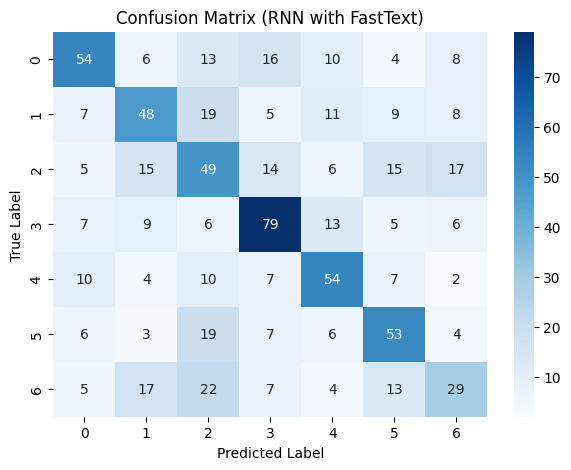

In [44]:
# Training and evaluating RNN with FastText embeddings
print('=== Training RNN with FastText Embeddings ===')
rnn_ft = rnn_model(embedding_matrix_ft, tokenizer.word_index, embedding_dim=300)
train_DL_model(rnn_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="RNN with FastText")

### 6.2.3 Bi-LSTM

In [45]:
# Bi-LSTM model without attention mechanism *Baseline*
def bilstm_model(embedding_matrix, word_index, embedding_dim=300):
    model = Sequential([
        Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim,
                  weights=[embedding_matrix], input_length=max_len, trainable=True),
        Bidirectional(LSTM(128, return_sequences=True, activation='tanh', 
                           kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001))),
        BatchNormalization(),
        Dropout(0.3),
        Bidirectional(LSTM(64, activation='tanh', 
                           kernel_regularizer=l2(0.001), recurrent_regularizer=l2(0.001))),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(len(set(y_train)), activation='softmax')
    ])
    optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


Embedding -> Bi-LSTM (128, L2 regularization) ->Batch Normalization + Dropout ->Bi-LSTM (64, L2 regularization) -> Batch Normalization + Dropout -> Dense -> SoftMax
- Regularization-heavy (L2, dropout, batch norm) to combat overfitting.
- No attention mechanism, relies purely on LSTM context.
- Baseline

=== Training Bi-LSTM with Word2Vec Embeddings ===
Epoch 1/10
377/377 - 50s - 132ms/step - accuracy: 0.1810 - loss: 3.8362 - val_accuracy: 0.2935 - val_loss: 3.3606
Epoch 2/10
377/377 - 43s - 114ms/step - accuracy: 0.2673 - loss: 3.3687 - val_accuracy: 0.3878 - val_loss: 3.0019
Epoch 3/10
377/377 - 79s - 210ms/step - accuracy: 0.3447 - loss: 3.0460 - val_accuracy: 0.4250 - val_loss: 2.7813
Epoch 4/10
377/377 - 42s - 111ms/step - accuracy: 0.4049 - loss: 2.7978 - val_accuracy: 0.4595 - val_loss: 2.5893
Epoch 5/10
377/377 - 43s - 114ms/step - accuracy: 0.4660 - loss: 2.5745 - val_accuracy: 0.4861 - val_loss: 2.4710
Epoch 6/10
377/377 - 43s - 115ms/step - accuracy: 0.5071 - loss: 2.3862 - val_accuracy: 0.5086 - val_loss: 2.3577
Epoch 7/10
377/377 - 43s - 113ms/step - accuracy: 0.5576 - loss: 2.2107 - val_accuracy: 0.5299 - val_loss: 2.2764
Epoch 8/10
377/377 - 42s - 113ms/step - accuracy: 0.5983 - loss: 2.0607 - val_accuracy: 0.5339 - val_loss: 2.2210
Epoch 9/10
377/377 - 42s - 112ms/step 

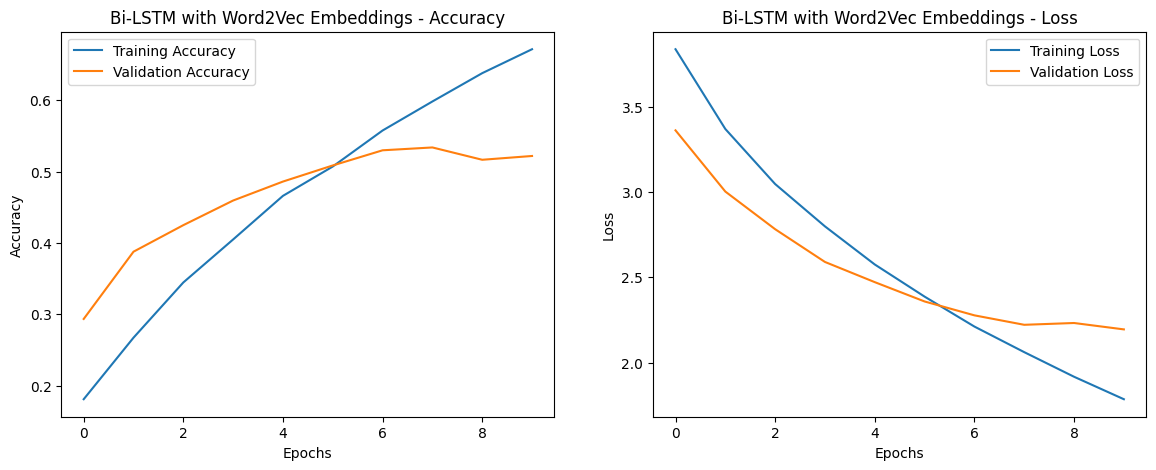

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step
Bi-LSTM with Word2Vec Embeddings - Validation Accuracy: 0.5219
Classification Report (Bi-LSTM with Word2Vec Embeddings):
               precision    recall  f1-score   support

           0       0.53      0.60      0.56       111
           1       0.46      0.38      0.42       107
           2       0.42      0.29      0.34       121
           3       0.62      0.76      0.68       125
           4       0.59      0.60      0.59        94
           5       0.54      0.61      0.57        98
           6       0.42      0.40      0.41        97

    accuracy                           0.52       753
   macro avg       0.51      0.52      0.51       753
weighted avg       0.51      0.52      0.51       753



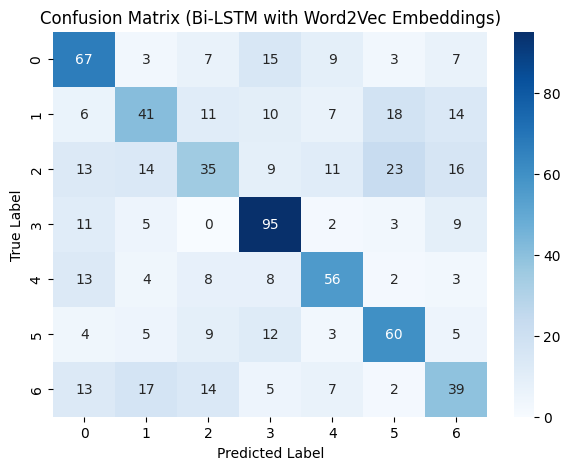

In [46]:
# Training and Evaluating Bi-LSTM with Word2Vec Embeddings
print('=== Training Bi-LSTM with Word2Vec Embeddings ===')
bilstm_w2v = bilstm_model(embedding_matrix_w2v, tokenizer.word_index)
train_DL_model(bilstm_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="Bi-LSTM with Word2Vec Embeddings")

=== Training Bi-LSTM with FastText Embeddings ===
Epoch 1/10
377/377 - 48s - 126ms/step - accuracy: 0.1753 - loss: 3.9380 - val_accuracy: 0.2815 - val_loss: 3.4298
Epoch 2/10
377/377 - 41s - 110ms/step - accuracy: 0.2789 - loss: 3.3529 - val_accuracy: 0.4263 - val_loss: 2.9729
Epoch 3/10
377/377 - 44s - 116ms/step - accuracy: 0.3811 - loss: 2.9658 - val_accuracy: 0.4635 - val_loss: 2.6928
Epoch 4/10
377/377 - 41s - 110ms/step - accuracy: 0.4696 - loss: 2.6420 - val_accuracy: 0.4834 - val_loss: 2.5289
Epoch 5/10
377/377 - 41s - 110ms/step - accuracy: 0.5393 - loss: 2.3773 - val_accuracy: 0.5126 - val_loss: 2.3879
Epoch 6/10
377/377 - 41s - 109ms/step - accuracy: 0.6019 - loss: 2.1450 - val_accuracy: 0.5179 - val_loss: 2.3467
Epoch 7/10
377/377 - 41s - 109ms/step - accuracy: 0.6661 - loss: 1.9384 - val_accuracy: 0.5272 - val_loss: 2.3428
Epoch 8/10
377/377 - 41s - 109ms/step - accuracy: 0.7053 - loss: 1.7741 - val_accuracy: 0.5286 - val_loss: 2.3390
Epoch 9/10
377/377 - 42s - 111ms/step 

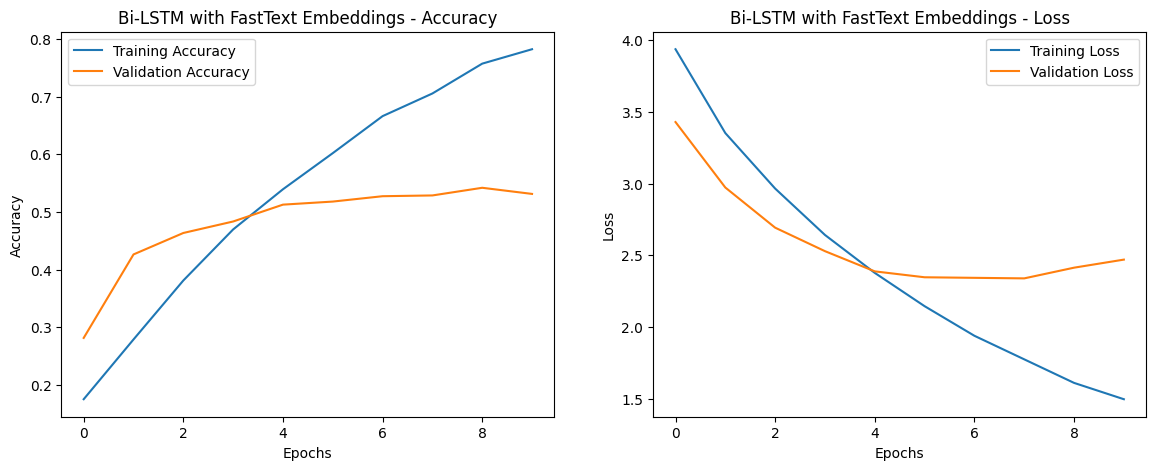

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
Bi-LSTM with FastText Embeddings - Validation Accuracy: 0.5312
Classification Report (Bi-LSTM with FastText Embeddings):
               precision    recall  f1-score   support

           0       0.59      0.62      0.61       111
           1       0.45      0.42      0.43       107
           2       0.41      0.38      0.39       121
           3       0.68      0.73      0.70       125
           4       0.50      0.68      0.58        94
           5       0.61      0.52      0.56        98
           6       0.43      0.35      0.39        97

    accuracy                           0.53       753
   macro avg       0.53      0.53      0.52       753
weighted avg       0.53      0.53      0.53       753



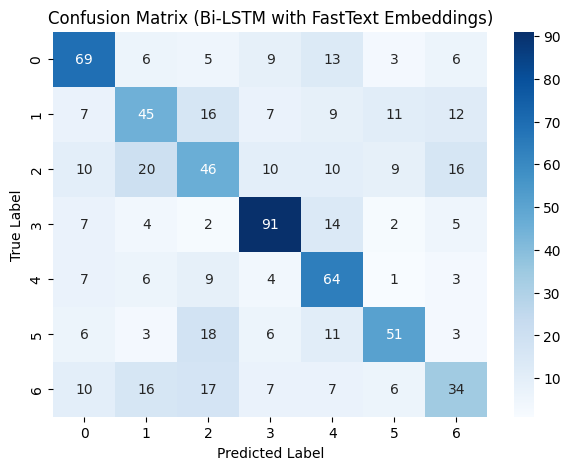

In [47]:
# Training and Evaluating Bi-LSTM with FastText Embeddings
print('=== Training Bi-LSTM with FastText Embeddings ===')
bilstm_ft = bilstm_model(embedding_matrix_ft, tokenizer.word_index)
train_DL_model(bilstm_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="Bi-LSTM with FastText Embeddings")

In [48]:
# Bi-LSTM with Multi-Head Attention model
def multihead_attention_bilstm(embedding_matrix, word_index):
    inputs = Input(shape=(max_len,))
    
    # Embedding Layer (enable masking)
    x = Embedding(
        input_dim=len(word_index) + 1,
        output_dim=300,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True,
        mask_zero=True
    )(inputs)
    
    # Bi-LSTM Layer
    x = Bidirectional(LSTM(
        64, 
        return_sequences=True,
        dropout=0.3
    ))(x)  # Output shape: (batch_size, max_len, 128)
    
    # Attention Mechanism (using MultiHeadAttention for better stability)
    attention = tf.keras.layers.MultiHeadAttention(
        num_heads=4, key_dim=64, dropout=0.3
    )(x, x)  # Self-attention (query, value)

    # Residual Connection and Layer Normalization
    x = tf.keras.layers.Add()([x, attention])
    x = LayerNormalization()(x)
    
    # Pooling and Classification
    x = GlobalMaxPooling1D()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)
    
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=1e-4,
        clipnorm=1.0
    )
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Embedding -> Bi-LSTM (64) -> Multi-Head Attention (4 heads) -> Residual connection + Layer normalization -> Global Max Pooling -> Dense (64 ReLU, L2 regularization + Dropout) -> Softmax
- Better generalization with dropout and regularization 
- More computationally expensive, complex

=== Training Bi-LSTM with MultiHead Attention and Word2Vec Embeddings===
Epoch 1/50
189/189 - 31s - 163ms/step - accuracy: 0.1631 - loss: 2.1545 - val_accuracy: 0.2284 - val_loss: 1.9327 - learning_rate: 1.0000e-04
Epoch 2/50
189/189 - 27s - 144ms/step - accuracy: 0.1868 - loss: 1.9457 - val_accuracy: 0.3081 - val_loss: 1.9034 - learning_rate: 1.0000e-04
Epoch 3/50
189/189 - 26s - 138ms/step - accuracy: 0.2160 - loss: 1.9045 - val_accuracy: 0.3891 - val_loss: 1.8086 - learning_rate: 1.0000e-04
Epoch 4/50
189/189 - 24s - 129ms/step - accuracy: 0.2786 - loss: 1.8279 - val_accuracy: 0.4316 - val_loss: 1.6740 - learning_rate: 1.0000e-04
Epoch 5/50
189/189 - 24s - 130ms/step - accuracy: 0.3195 - loss: 1.7453 - val_accuracy: 0.4595 - val_loss: 1.5581 - learning_rate: 1.0000e-04
Epoch 6/50
189/189 - 24s - 129ms/step - accuracy: 0.3701 - loss: 1.6518 - val_accuracy: 0.4874 - val_loss: 1.4449 - learning_rate: 1.0000e-04
Epoch 7/50
189/189 - 24s - 129ms/step - accuracy: 0.4090 - loss: 1.5767 - v

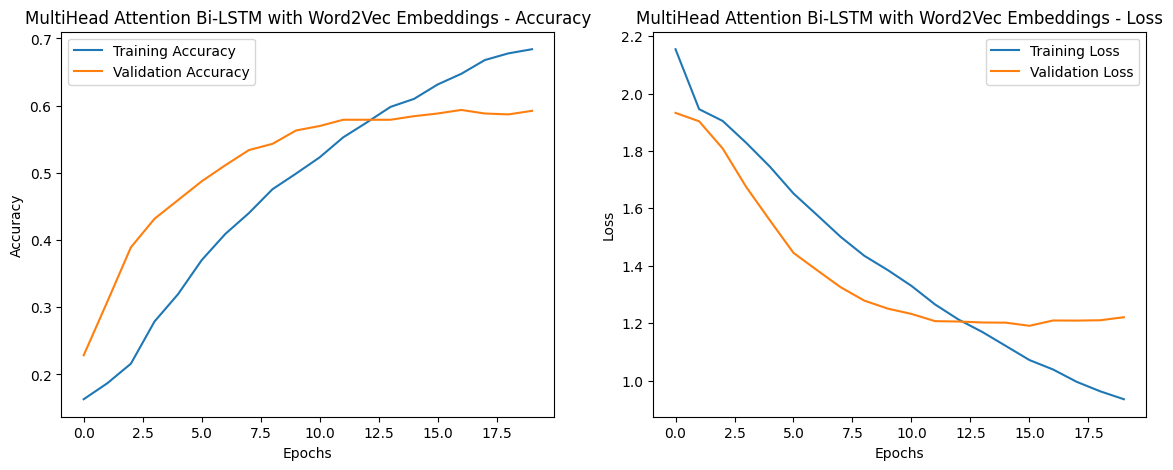

24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step
MultiHead Attention Bi-LSTM with Word2Vec Embeddings - Validation Accuracy: 0.5883
Classification Report (MultiHead Attention Bi-LSTM with Word2Vec Embeddings):
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       111
           1       0.54      0.51      0.53       107
           2       0.44      0.45      0.45       121
           3       0.70      0.82      0.76       125
           4       0.64      0.61      0.62        94
           5       0.66      0.60      0.63        98
           6       0.43      0.44      0.44        97

    accuracy                           0.59       753
   macro avg       0.59      0.58      0.58       753
weighted avg       0.59      0.59      0.59       753



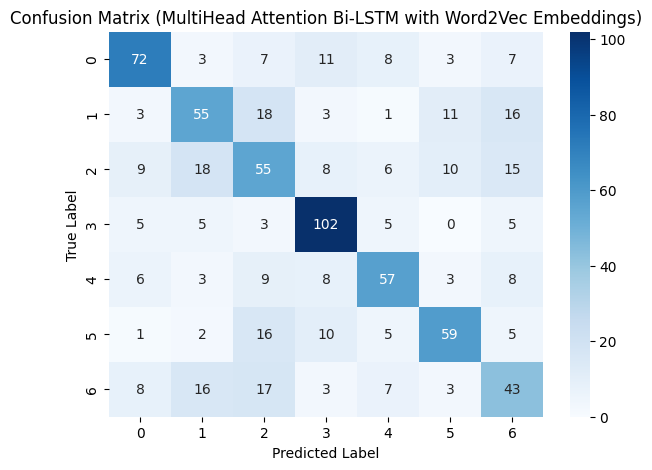

In [49]:
print('=== Training Bi-LSTM with MultiHead Attention and Word2Vec Embeddings===')
multihead_bilstm_w2v = multihead_attention_bilstm(embedding_matrix_w2v, tokenizer.word_index)

# Initialize callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience=4,               # Stops if no improvement for 4 epochs
        restore_best_weights=True # Restores the best model weights
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        factor=0.5,               # Reduces learning rate by half
        patience=2,               # Triggers if no improvement for 2 epochs
        min_lr=1e-6               # Sets a minimum learning rate
    )
]

train_DL_model(multihead_bilstm_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc,model_name="MultiHead Attention Bi-LSTM with Word2Vec Embeddings",epochs=50,batch_size=64,callbacks=callbacks)

Epoch 1/50
189/189 - 40s - 213ms/step - accuracy: 0.1632 - loss: 2.0614 - val_accuracy: 0.1713 - val_loss: 1.9437 - learning_rate: 1.0000e-04
Epoch 2/50
189/189 - 27s - 144ms/step - accuracy: 0.1766 - loss: 1.9512 - val_accuracy: 0.2815 - val_loss: 1.9114 - learning_rate: 1.0000e-04
Epoch 3/50
189/189 - 27s - 142ms/step - accuracy: 0.2085 - loss: 1.9224 - val_accuracy: 0.3333 - val_loss: 1.8449 - learning_rate: 1.0000e-04
Epoch 4/50
189/189 - 28s - 151ms/step - accuracy: 0.2563 - loss: 1.8617 - val_accuracy: 0.3878 - val_loss: 1.7192 - learning_rate: 1.0000e-04
Epoch 5/50
189/189 - 28s - 146ms/step - accuracy: 0.3094 - loss: 1.7707 - val_accuracy: 0.4422 - val_loss: 1.5918 - learning_rate: 1.0000e-04
Epoch 6/50
189/189 - 27s - 145ms/step - accuracy: 0.3610 - loss: 1.6691 - val_accuracy: 0.4874 - val_loss: 1.4909 - learning_rate: 1.0000e-04
Epoch 7/50
189/189 - 26s - 140ms/step - accuracy: 0.4097 - loss: 1.5712 - val_accuracy: 0.5166 - val_loss: 1.4154 - learning_rate: 1.0000e-04
Epoch 

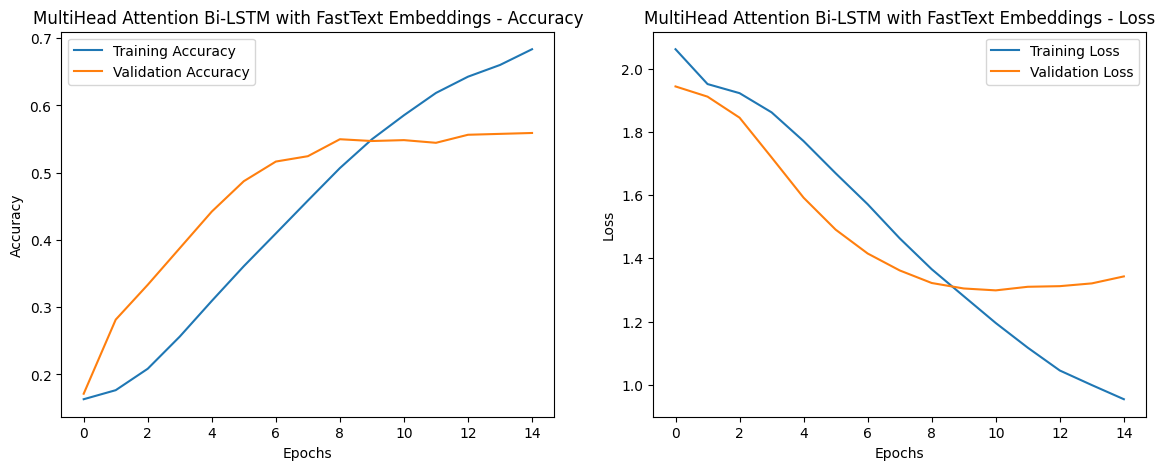

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
MultiHead Attention Bi-LSTM with FastText Embeddings - Validation Accuracy: 0.5485
Classification Report (MultiHead Attention Bi-LSTM with FastText Embeddings):
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       111
           1       0.53      0.36      0.43       107
           2       0.39      0.43      0.41       121
           3       0.69      0.73      0.71       125
           4       0.58      0.66      0.62        94
           5       0.60      0.53      0.56        98
           6       0.42      0.48      0.45        97

    accuracy                           0.55       753
   macro avg       0.55      0.55      0.55       753
weighted avg       0.55      0.55      0.55       753



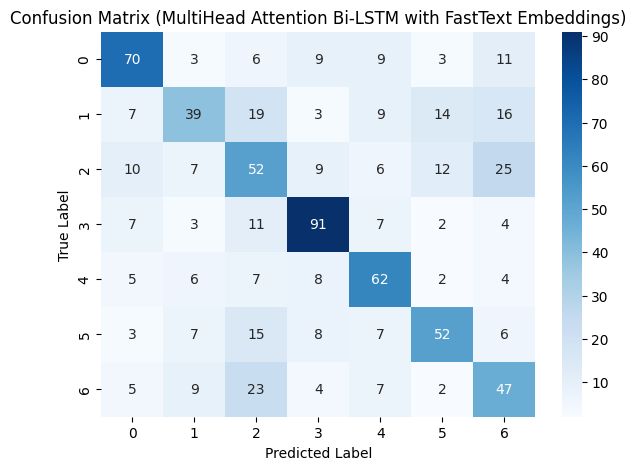

In [50]:
# Training and Evaluating Bi-LSTM with Multi-Head Attention and FastText Embeddings
multihead_bilstm_ft = multihead_attention_bilstm(embedding_matrix_ft, tokenizer.word_index)
train_DL_model( multihead_bilstm_ft,  X_train_pad, y_train_enc, X_val_pad, y_val_enc,model_name="MultiHead Attention Bi-LSTM with FastText Embeddings", epochs=50, batch_size=64, callbacks=callbacks)

In [51]:
# Bi-LSTM with Bahdanau Attention model
def bahdanau_attention_bilstm(embedding_matrix, word_index):
    inputs = tf.keras.Input(shape=(max_len,))
    
    # Embedding layer (freeze initially if dataset is small)
    x = Embedding(
        len(word_index)+1, 300,
        weights=[embedding_matrix],
        trainable=False  # Freeze embeddings to reduce overfitting
    )(inputs)
    
    # Bi-LSTM with dropout
    x = Bidirectional(LSTM(
        64, 
        return_sequences=True,
        dropout=0.3,  # Recurrent dropout
        kernel_regularizer=l2(1e-4)  # Weight regularization
    ))(x)
    
    # Bahdanau Attention
    query = Dense(64)(x)
    value = Dense(64)(x)
    attention = tf.keras.layers.AdditiveAttention()([query, value])
    
    # Concatenate + LayerNorm
    x = Concatenate()([x, attention])
    x = LayerNormalization()(x)
    
    # GlobalMaxPooling (better for sparse emotional keywords)
    x = GlobalMaxPooling1D()(x)
    
    # Classifier with dropout
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)
    
    # Optimizer with gradient clipping
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=1e-4,  # Lower learning rate
        clipnorm=1.0
    )
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Embedding -> Bi-LSTM (64) -> Bahdanau Attention (4 heads) -> Concatenation + Layer normalization -> Global Max Pooling -> Dense (64 ReLU, L2 regularization + Dropout) -> Softmax
- Frozen embeddings prevent overfitting, explicit additive attention 
- Limited adaptability if embeddings need tuning

=== Training Bi-LSTM with Bahdanau Attention and Word2Vec Embeddings ===
Epoch 1/50
189/189 - 48s - 253ms/step - accuracy: 0.1585 - loss: 2.2000 - val_accuracy: 0.2404 - val_loss: 1.9780 - learning_rate: 1.0000e-04
Epoch 2/50
189/189 - 32s - 170ms/step - accuracy: 0.1944 - loss: 1.9969 - val_accuracy: 0.3094 - val_loss: 1.9320 - learning_rate: 1.0000e-04
Epoch 3/50
189/189 - 31s - 164ms/step - accuracy: 0.2134 - loss: 1.9668 - val_accuracy: 0.3692 - val_loss: 1.8743 - learning_rate: 1.0000e-04
Epoch 4/50
189/189 - 39s - 209ms/step - accuracy: 0.2360 - loss: 1.9362 - val_accuracy: 0.3984 - val_loss: 1.8157 - learning_rate: 1.0000e-04
Epoch 5/50
189/189 - 29s - 155ms/step - accuracy: 0.2669 - loss: 1.8922 - val_accuracy: 0.4170 - val_loss: 1.7421 - learning_rate: 1.0000e-04
Epoch 6/50
189/189 - 41s - 215ms/step - accuracy: 0.2976 - loss: 1.8485 - val_accuracy: 0.4675 - val_loss: 1.6547 - learning_rate: 1.0000e-04
Epoch 7/50
189/189 - 29s - 152ms/step - accuracy: 0.3176 - loss: 1.8131 - v

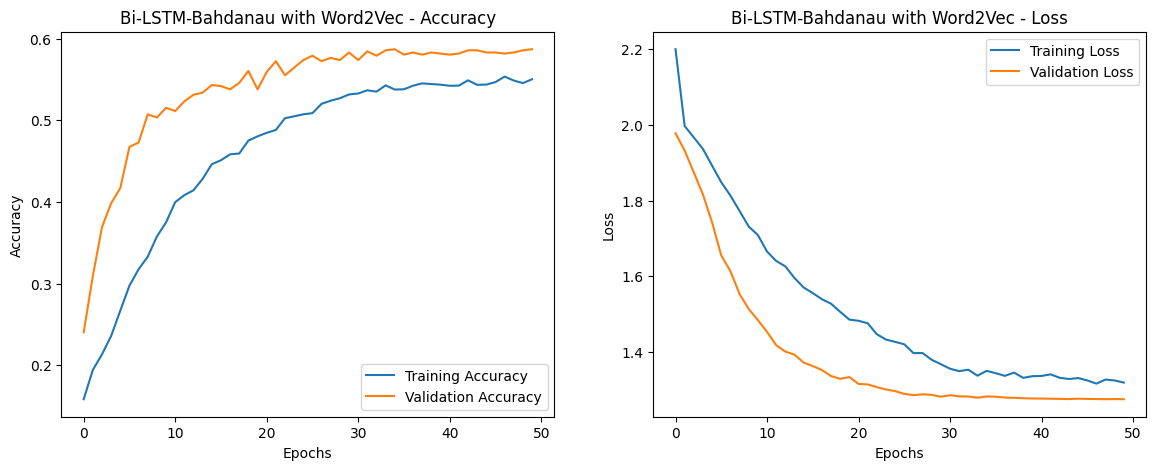

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Bi-LSTM-Bahdanau with Word2Vec - Validation Accuracy: 0.5870
Classification Report (Bi-LSTM-Bahdanau with Word2Vec):
               precision    recall  f1-score   support

           0       0.64      0.59      0.61       111
           1       0.56      0.49      0.52       107
           2       0.49      0.49      0.49       121
           3       0.66      0.84      0.74       125
           4       0.56      0.64      0.60        94
           5       0.69      0.60      0.64        98
           6       0.49      0.43      0.46        97

    accuracy                           0.59       753
   macro avg       0.58      0.58      0.58       753
weighted avg       0.58      0.59      0.58       753



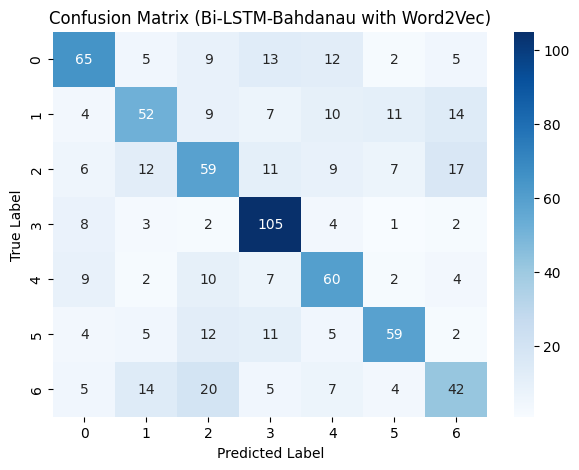

In [52]:
# Training and Evaluating Bi-LSTM with Bahdanau attention and Word2Vec Embeddings
print('=== Training Bi-LSTM with Bahdanau Attention and Word2Vec Embeddings ===')

bahadanau_bilstm_w2v = bahdanau_attention_bilstm( embedding_matrix=embedding_matrix_w2v, word_index=tokenizer.word_index)
train_DL_model(bahadanau_bilstm_w2v, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="Bi-LSTM-Bahdanau with Word2Vec", epochs=50, batch_size=64, callbacks=callbacks)

=== Training Bi-LSTM with Bahdanau Attention and FastText Embeddings ===
Epoch 1/50
189/189 - 33s - 176ms/step - accuracy: 0.1509 - loss: 2.1344 - val_accuracy: 0.1527 - val_loss: 2.0080 - learning_rate: 1.0000e-04
Epoch 2/50
189/189 - 49s - 261ms/step - accuracy: 0.1434 - loss: 2.0162 - val_accuracy: 0.1554 - val_loss: 2.0068 - learning_rate: 1.0000e-04
Epoch 3/50
189/189 - 30s - 158ms/step - accuracy: 0.1611 - loss: 2.0091 - val_accuracy: 0.1607 - val_loss: 2.0055 - learning_rate: 1.0000e-04
Epoch 4/50
189/189 - 29s - 153ms/step - accuracy: 0.1648 - loss: 2.0041 - val_accuracy: 0.1368 - val_loss: 1.9982 - learning_rate: 1.0000e-04
Epoch 5/50
189/189 - 29s - 154ms/step - accuracy: 0.1643 - loss: 2.0000 - val_accuracy: 0.1740 - val_loss: 1.9916 - learning_rate: 1.0000e-04
Epoch 6/50
189/189 - 42s - 225ms/step - accuracy: 0.1745 - loss: 1.9920 - val_accuracy: 0.2098 - val_loss: 1.9754 - learning_rate: 1.0000e-04
Epoch 7/50
189/189 - 50s - 265ms/step - accuracy: 0.1790 - loss: 1.9827 - v

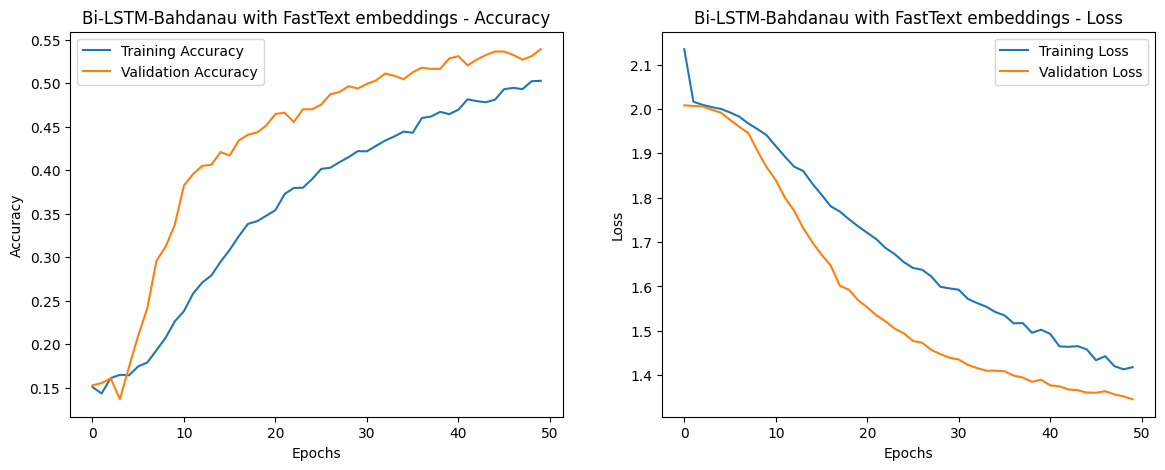

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
Bi-LSTM-Bahdanau with FastText embeddings - Validation Accuracy: 0.5392
Classification Report (Bi-LSTM-Bahdanau with FastText embeddings):
               precision    recall  f1-score   support

           0       0.62      0.55      0.58       111
           1       0.48      0.40      0.44       107
           2       0.47      0.36      0.41       121
           3       0.66      0.80      0.72       125
           4       0.54      0.65      0.59        94
           5       0.52      0.60      0.56        98
           6       0.41      0.39      0.40        97

    accuracy                           0.54       753
   macro avg       0.53      0.54      0.53       753
weighted avg       0.53      0.54      0.53       753



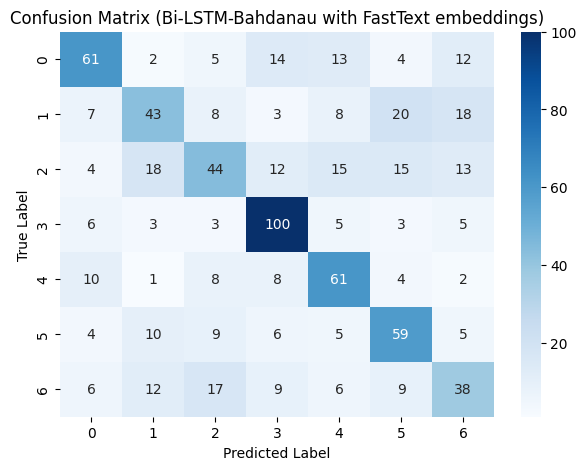

In [53]:
# Training and Evaluating Bi-LSTM with Bahdanau attention and FastText Embeddings
print('=== Training Bi-LSTM with Bahdanau Attention and FastText Embeddings ===')
bahadanau_bilstm_ft = bahdanau_attention_bilstm( embedding_matrix=embedding_matrix_ft, word_index=tokenizer.word_index)
train_DL_model(bahadanau_bilstm_ft, X_train_pad, y_train_enc, X_val_pad, y_val_enc, model_name="Bi-LSTM-Bahdanau with FastText embeddings", epochs=50, batch_size=64, callbacks=callbacks)

## 6.3 Transformers
- BERT
- XLNet
- DistilBERT
- RoBERTa


In [23]:
# Convert tokens back to text for Transformers withouot data augmentation
X_train_trans = [' '.join(tokens) for tokens in X_train]
X_val_trans = [' '.join(tokens) for tokens in X_val]
X_test_trans = [' '.join(tokens) for tokens in X_test]

In [24]:
# Encoding labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

In [25]:
# Function for tokenization for Transformers
def encode_texts(texts, tokenizer, max_length):
    return tokenizer(
        texts,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

In [26]:
# Function to train a transformer model
def train_transformer_model(model, train_encodings, y_train, val_encodings, y_val, epochs=3):
    history = model.fit(
        {'input_ids': train_encodings['input_ids'],
         'attention_mask': train_encodings['attention_mask']},
        y_train,
        validation_data=(
            {'input_ids': val_encodings['input_ids'],
             'attention_mask': val_encodings['attention_mask']},
            y_val
        ),
        epochs=epochs,
        batch_size=8,
        use_multiprocessing=True,
        workers=4
    )
    
    # Plot Training History - Accuracy and Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training History - Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training History - Loss')
    plt.legend()
    plt.show()
    
    return history 

In [27]:
# Function to evaluate Transformer models
def evaluate_model(model, test_encodings, y_test, label_encoder, model_name):
  # Evaluate the model on the test set
    test_results = model.evaluate(
        {'input_ids': test_encodings['input_ids'],
         'attention_mask': test_encodings['attention_mask']},
        y_test
    )
    print(f'{model_name} Test Accuracy: {test_results[1]:.4f}')

  # Make predictions on test set
    y_pred = np.argmax(model.predict({
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    }).logits, axis=1)

  # Classification Report
    print(f'Classification Report ({model_name}):')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

  # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return y_pred  # Return predictions for ensemble learning

In [28]:
# Define parameters
max_len = 64
num_labels = len(label_encoder.classes_)
num_train_samples = len(X_train_trans)
batch_size = 8
epochs = 3
num_train_steps = (num_train_samples // batch_size) * epochs

def compile_transformer_model(model, num_train_steps):
    optimizer, _ = create_optimizer(
        init_lr=3e-5,  
        num_train_steps=num_train_steps,
        num_warmup_steps=int(0.1 * num_train_steps),
        weight_decay_rate=0.01
    )
    
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

### 6.3.1 BERT

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


=== Training BERT model ===
Epoch 1/3


753/753 [==============================] - 1546s 2s/step - loss: 1.4978 - accuracy: 0.4301 - val_loss: 1.1534 - val_accuracy: 0.5950
Epoch 2/3
753/753 [==============================] - 1739s 2s/step - loss: 0.9407 - accuracy: 0.6843 - val_loss: 1.0563 - val_accuracy: 0.6361
Epoch 3/3
753/753 [==============================] - 1256s 2s/step - loss: 0.5988 - accuracy: 0.8147 - val_loss: 1.1191 - val_accuracy: 0.6135


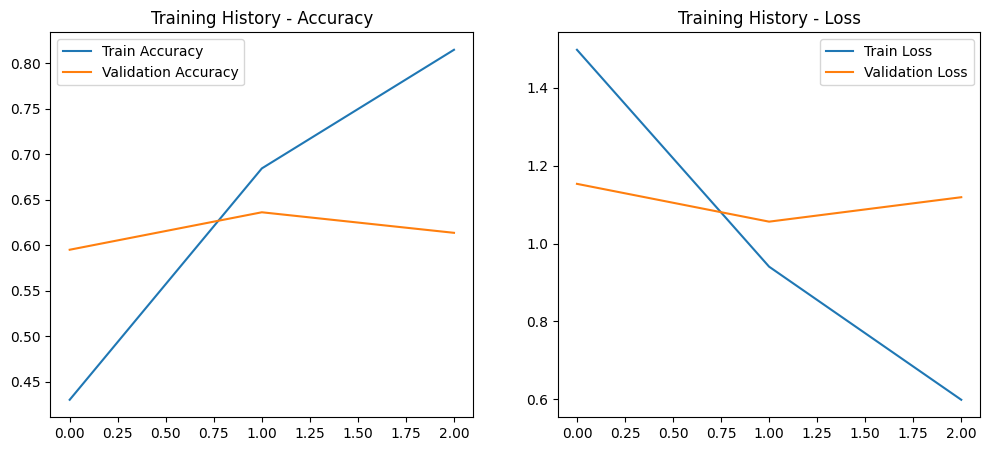

24/24 [==============================] - 48s 2s/step - loss: 1.1493 - accuracy: 0.6454
BERT Test Accuracy: 0.6454
24/24 [==============================] - 57s 2s/step
Classification Report (BERT):
              precision    recall  f1-score   support

       anger       0.66      0.72      0.69       108
     disgust       0.54      0.50      0.52       109
        fear       0.52      0.54      0.53       105
       guilt       0.80      0.81      0.80       109
         joy       0.72      0.73      0.73        97
     sadness       0.71      0.59      0.65       119
       shame       0.57      0.63      0.60       106

    accuracy                           0.65       753
   macro avg       0.65      0.65      0.65       753
weighted avg       0.65      0.65      0.65       753



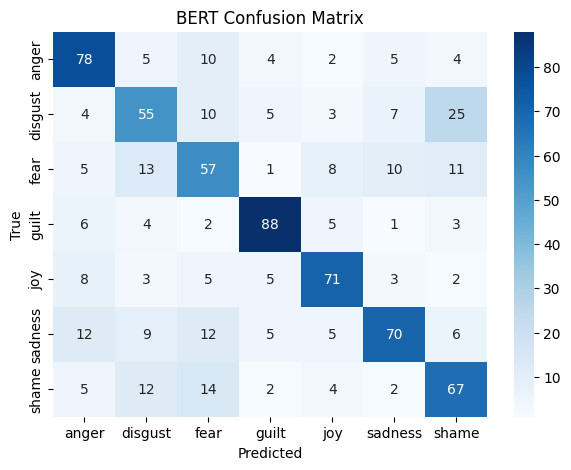

In [29]:
# BERT model *Baseline*
def load_bert_model(num_labels, num_train_steps):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = TFBertForSequenceClassification.from_pretrained(
        'bert-base-uncased',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# BERT pipeline
tokenizer_bert, bert_model = load_bert_model(num_labels, num_train_steps)
train_encodings_bert = encode_texts(X_train_trans, tokenizer_bert, max_len)
val_encodings_bert = encode_texts(X_val_trans, tokenizer_bert, max_len)
test_encodings_bert = encode_texts(X_test_trans, tokenizer_bert, max_len)

print('=== Training BERT model ===')
bert_history = train_transformer_model(bert_model, train_encodings_bert, y_train_enc, val_encodings_bert, y_val_enc)
y_pred_bert = evaluate_model(bert_model, test_encodings_bert, y_test_enc, label_encoder, 'BERT')

### 6.3.2 XLNet

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFXLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary', 'logits_proj']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


=== Training XLNet model ===
Epoch 1/3
753/753 [==============================] - 1542s 2s/step - loss: 1.8286 - accuracy: 0.2413 - val_loss: 1.2387 - val_accuracy: 0.5764
Epoch 2/3
753/753 [==============================] - 1603s 2s/step - loss: 1.1791 - accuracy: 0.5927 - val_loss: 1.0947 - val_accuracy: 0.6202
Epoch 3/3
753/753 [==============================] - 1585s 2s/step - loss: 0.8965 - accuracy: 0.6916 - val_loss: 1.0931 - val_accuracy: 0.6268


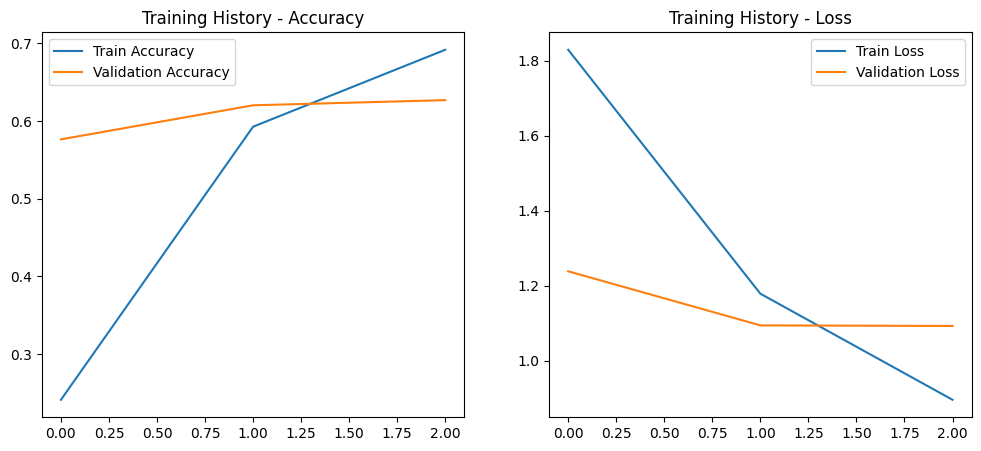

24/24 [==============================] - 49s 2s/step - loss: 1.1282 - accuracy: 0.6441
XLNet Test Accuracy: 0.6441
24/24 [==============================] - 70s 2s/step
Classification Report (XLNet):
              precision    recall  f1-score   support

       anger       0.66      0.74      0.70       108
     disgust       0.59      0.47      0.52       109
        fear       0.49      0.58      0.53       105
       guilt       0.78      0.80      0.79       109
         joy       0.71      0.78      0.75        97
     sadness       0.66      0.58      0.62       119
       shame       0.62      0.58      0.60       106

    accuracy                           0.64       753
   macro avg       0.64      0.65      0.64       753
weighted avg       0.64      0.64      0.64       753



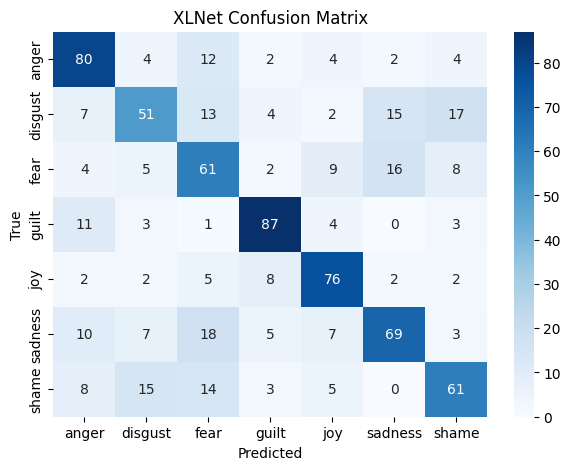

In [30]:
# XLNet model
def load_xlnet_model(num_labels, num_train_steps):
    tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
    model = TFXLNetForSequenceClassification.from_pretrained(
        'xlnet-base-cased',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# XLNet pipeline
tokenizer_xlnet, xlnet_model = load_xlnet_model(num_labels, num_train_steps)
train_encodings_xlnet = encode_texts(X_train_trans, tokenizer_xlnet, max_len)
val_encodings_xlnet = encode_texts(X_val_trans, tokenizer_xlnet, max_len)
test_encodings_xlnet = encode_texts(X_test_trans, tokenizer_xlnet, max_len)

print('=== Training XLNet model ===')
xlnet_history = train_transformer_model(xlnet_model, train_encodings_xlnet, y_train_enc, val_encodings_xlnet, y_val_enc)
y_pred_xlnet = evaluate_model(xlnet_model, test_encodings_xlnet, y_test_enc, label_encoder, 'XLNet')

### 6.3.3 DistilBERT

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

=== Training DistilBERT model ===
Epoch 1/3
753/753 [==============================] - 671s 874ms/step - loss: 1.4720 - accuracy: 0.4616 - val_loss: 1.1811 - val_accuracy: 0.5684
Epoch 2/3
753/753 [==============================] - 671s 891ms/step - loss: 0.9602 - accuracy: 0.6797 - val_loss: 1.1136 - val_accuracy: 0.5950
Epoch 3/3
753/753 [==============================] - 629s 836ms/step - loss: 0.6791 - accuracy: 0.7923 - val_loss: 1.1471 - val_accuracy: 0.6003


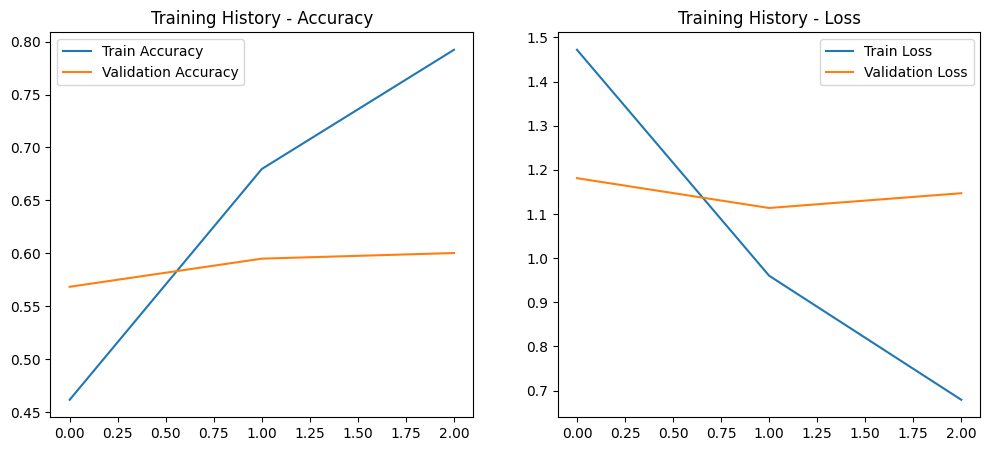

24/24 [==============================] - 22s 899ms/step - loss: 1.1199 - accuracy: 0.6268
DistilBERT Test Accuracy: 0.6268
24/24 [==============================] - 29s 962ms/step
Classification Report (DistilBERT):
              precision    recall  f1-score   support

       anger       0.66      0.74      0.70       108
     disgust       0.53      0.50      0.51       109
        fear       0.54      0.53      0.54       105
       guilt       0.75      0.76      0.76       109
         joy       0.70      0.75      0.72        97
     sadness       0.67      0.57      0.62       119
       shame       0.53      0.55      0.54       106

    accuracy                           0.63       753
   macro avg       0.63      0.63      0.63       753
weighted avg       0.63      0.63      0.63       753



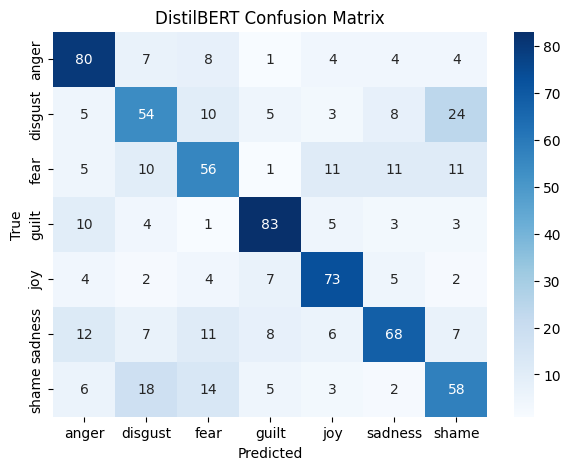

In [31]:
# DistilBERT model
def load_distilbert_model(num_labels, num_train_steps):
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    model = TFDistilBertForSequenceClassification.from_pretrained(
        'distilbert-base-uncased',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# DistilBERT pipeline
tokenizer_distilbert, distilbert_model = load_distilbert_model(num_labels, num_train_steps)
train_encodings_distilbert = encode_texts(X_train_trans, tokenizer_distilbert, max_len)
val_encodings_distilbert = encode_texts(X_val_trans, tokenizer_distilbert, max_len)
test_encodings_distilbert = encode_texts(X_test_trans, tokenizer_distilbert, max_len)

print('=== Training DistilBERT model ===')
distilbert_history = train_transformer_model(distilbert_model, train_encodings_distilbert, y_train_enc, val_encodings_distilbert, y_val_enc)
y_pred_distilbert = evaluate_model(distilbert_model, test_encodings_distilbert, y_test_enc, label_encoder, 'DistilBERT')

### 6.3.4 RoBERTa

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

=== Training RoBERTa model ===
Epoch 1/3
753/753 [==============================] - 1485s 2s/step - loss: 1.5094 - accuracy: 0.4354 - val_loss: 1.2993 - val_accuracy: 0.5418
Epoch 2/3
753/753 [==============================] - 1512s 2s/step - loss: 1.0601 - accuracy: 0.6322 - val_loss: 1.1102 - val_accuracy: 0.6056
Epoch 3/3
753/753 [==============================] - 1170s 2s/step - loss: 0.8047 - accuracy: 0.7321 - val_loss: 1.1188 - val_accuracy: 0.6348


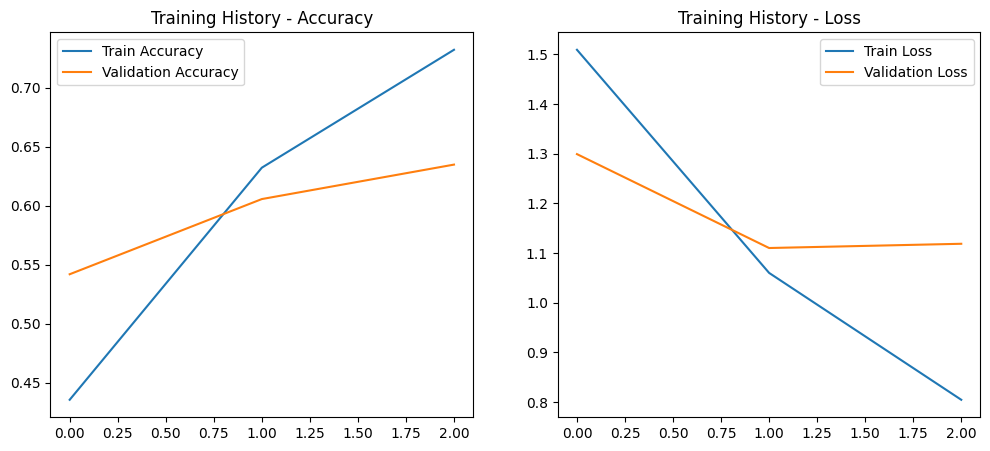

24/24 [==============================] - 40s 2s/step - loss: 1.0645 - accuracy: 0.6481
RoBERTa Test Accuracy: 0.6481
24/24 [==============================] - 69s 2s/step
Classification Report (RoBERTa):
              precision    recall  f1-score   support

       anger       0.68      0.71      0.69       108
     disgust       0.59      0.52      0.55       109
        fear       0.50      0.54      0.52       105
       guilt       0.80      0.78      0.79       109
         joy       0.73      0.75      0.74        97
     sadness       0.69      0.61      0.65       119
       shame       0.56      0.62      0.59       106

    accuracy                           0.65       753
   macro avg       0.65      0.65      0.65       753
weighted avg       0.65      0.65      0.65       753



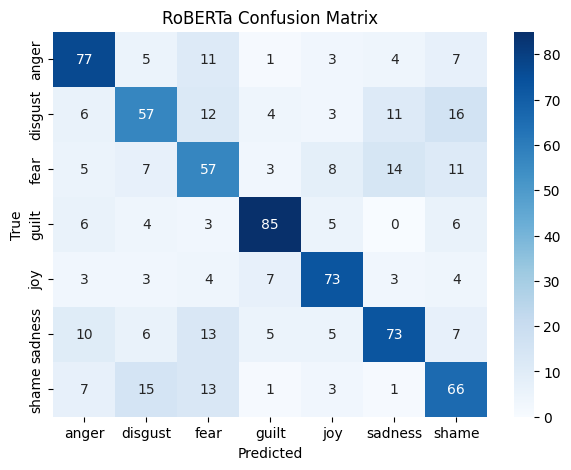

In [32]:
# RoBERTa model
def load_roberta_model(num_labels, num_train_steps):
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    model = TFRobertaForSequenceClassification.from_pretrained(
        'roberta-base',
        num_labels=num_labels
    )
    compile_transformer_model(model, num_train_steps)
    return tokenizer, model

# RoBERTa pipeline
tokenizer_roberta, roberta_model = load_roberta_model(num_labels, num_train_steps)
train_encodings_roberta = encode_texts(X_train_trans, tokenizer_roberta, max_len)
val_encodings_roberta = encode_texts(X_val_trans, tokenizer_roberta, max_len)
test_encodings_roberta = encode_texts(X_test_trans, tokenizer_roberta, max_len)

print('=== Training RoBERTa model ===')
roberta_history = train_transformer_model(roberta_model, train_encodings_roberta, y_train_enc, val_encodings_roberta, y_val_enc)
y_pred_roberta = evaluate_model(roberta_model, test_encodings_roberta, y_test_enc, label_encoder, 'RoBERTa')

# 7.0 Ensemble Learning
- Majority Voting
- Soft Voting
- Weighted Voting


In [39]:
def evaluate_predictions(y_true, y_pred, label_encoder, model_name):
    print(f'=== {model_name} Evaluation ===')
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')  
    
    # Classification Report
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### 7.1 Majority Voting

=== Majority Voting Evaluation ===
Accuracy: 0.6467
              precision    recall  f1-score   support

       anger       0.62      0.73      0.67       108
     disgust       0.55      0.51      0.53       109
        fear       0.50      0.57      0.54       105
       guilt       0.79      0.81      0.80       109
         joy       0.74      0.74      0.74        97
     sadness       0.73      0.57      0.64       119
       shame       0.62      0.60      0.61       106

    accuracy                           0.65       753
   macro avg       0.65      0.65      0.65       753
weighted avg       0.65      0.65      0.65       753



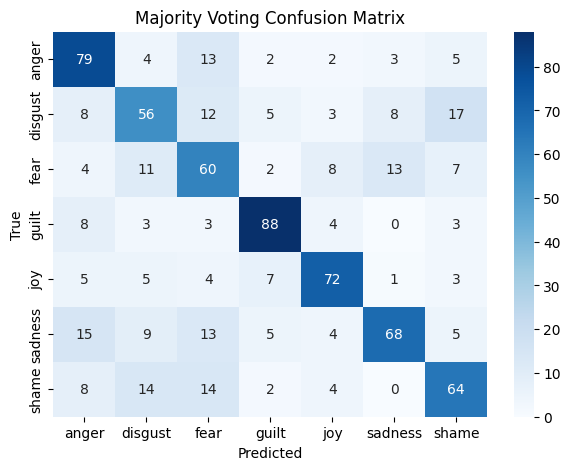

In [41]:
# Majority Voting (Hard Voting)
stacked_preds = np.column_stack((y_pred_bert, y_pred_xlnet, y_pred_roberta))
y_pred_majority = mode(stacked_preds, axis=1)[0].flatten()

# Evaluate Majority Voting Ensemble
evaluate_predictions(y_test_enc, y_pred_majority, label_encoder, 'Majority Voting')

- Takes the mode (most frequent class) across models.
- Simple but ignores confidence scores.

### 7.2 Soft Voting

24/24 [==============================] - 46s 2s/step
=== Soft Voting Evaluation ===
Accuracy: 0.6534
              precision    recall  f1-score   support

       anger       0.68      0.73      0.70       108
     disgust       0.58      0.52      0.55       109
        fear       0.51      0.54      0.53       105
       guilt       0.77      0.82      0.79       109
         joy       0.75      0.75      0.75        97
     sadness       0.73      0.61      0.66       119
       shame       0.56      0.61      0.59       106

    accuracy                           0.65       753
   macro avg       0.66      0.65      0.65       753
weighted avg       0.66      0.65      0.65       753



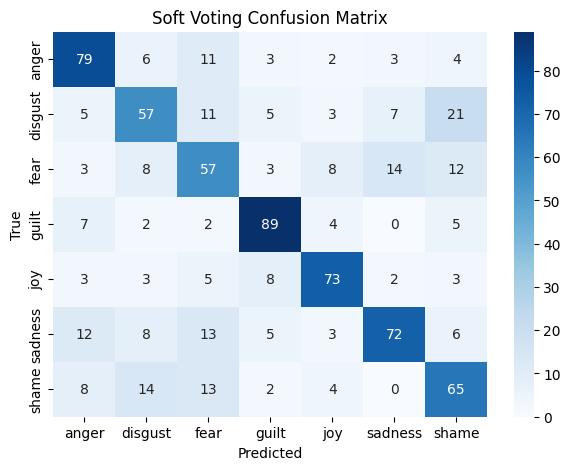

In [42]:
# Soft Voting
def get_probs(model, test_encodings):
    logits = model.predict({
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    }).logits
    return tf.nn.softmax(logits, axis=1).numpy()

# Get probabilities from each model
probs_bert = get_probs(bert_model, test_encodings_bert)
probs_xlnet = get_probs(xlnet_model, test_encodings_xlnet)
probs_roberta = get_probs(roberta_model, test_encodings_roberta)

# Average probabilities
avg_probs = (probs_bert + probs_xlnet + probs_roberta) / 3
y_pred_soft = np.argmax(avg_probs, axis=1)

# Evaluate Soft Voting Ensemble
evaluate_predictions(y_test_enc, y_pred_soft, label_encoder, 'Soft Voting')

- Uses confidence scores 
- Assumes calibrated probabilities

### 7.3 Weighted Voting

=== Weighted Voting Evaluation ===
Accuracy: 0.6534
              precision    recall  f1-score   support

       anger       0.68      0.73      0.70       108
     disgust       0.58      0.52      0.55       109
        fear       0.51      0.54      0.53       105
       guilt       0.77      0.82      0.79       109
         joy       0.75      0.75      0.75        97
     sadness       0.73      0.61      0.66       119
       shame       0.56      0.61      0.59       106

    accuracy                           0.65       753
   macro avg       0.66      0.65      0.65       753
weighted avg       0.66      0.65      0.65       753



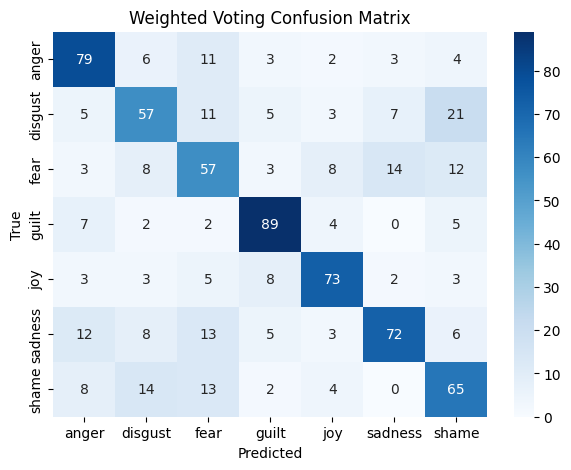

In [61]:
# Weighted Voting
test_accuracies = [
    accuracy_score(y_test_enc, y_pred_bert),
    accuracy_score(y_test_enc, y_pred_xlnet),
    accuracy_score(y_test_enc, y_pred_roberta)
]
weights = np.array(test_accuracies) / sum(test_accuracies)

# Weighted probabilities
y_pred_proba_ensemble = (
    weights[0] * probs_bert +
    weights[1] * probs_xlnet +
    weights[2] * probs_roberta
)

y_pred_weighted = np.argmax(y_pred_proba_ensemble, axis=1)

# Evaluate Weighted Voting Ensemble
evaluate_predictions(y_test_enc, y_pred_weighted, label_encoder, 'Weighted Voting')

- Weighs models according to their validation accuracy.

# 8.0 Deployment

In [ ]:
# Create model directory
model_dir = Path("model_directory")
model_dir.mkdir(exist_ok=True)

# Save individual models
bert_model.save_pretrained(model_dir/"bert_model")
xlnet_model.save_pretrained(model_dir/"xlnet_model")
roberta_model.save_pretrained(model_dir/"roberta_model")

# Save tokenizers
tokenizer_bert.save_pretrained(model_dir/"bert_tokenizer")
tokenizer_xlnet.save_pretrained(model_dir/"xlnet_tokenizer")
tokenizer_roberta.save_pretrained(model_dir/"roberta_tokenizer")

# Save label encoder
with open(model_dir/"label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Save metadata 
metadata = {
    "max_len": max_len,
    "num_labels": num_labels,
}
with open(model_dir/"metadata.pkl", "wb") as f:
    pickle.dump(metadata, f)

In [66]:
# Deployment
class SoftVotingEnsemble:
    def __init__(self, model_dir):
        self.model_dir = Path(model_dir)
        self.max_len = 64  # Update from metadata if saved
        
        # Load models
        self.bert_model = TFBertForSequenceClassification.from_pretrained(self.model_dir/"bert_model")
        self.xlnet_model = TFXLNetForSequenceClassification.from_pretrained(self.model_dir/"xlnet_model")
        self.roberta_model = TFRobertaForSequenceClassification.from_pretrained(self.model_dir/"roberta_model")
        
        # Load tokenizers
        self.bert_tokenizer = BertTokenizer.from_pretrained(self.model_dir/"bert_tokenizer")
        self.xlnet_tokenizer = XLNetTokenizer.from_pretrained(self.model_dir/"xlnet_tokenizer")
        self.roberta_tokenizer = RobertaTokenizer.from_pretrained(self.model_dir/"roberta_tokenizer")
        
        # Load label encoder
        with open(self.model_dir/"label_encoder.pkl", "rb") as f:
            self.label_encoder = pickle.load(f)
            
    def preprocess(self, text):
        def _encode(tokenizer, text):
            return tokenizer(
                text,
                truncation=True,
                padding='max_length',
                max_length=self.max_len,
                return_tensors='tf'
            )
        return {
            'bert': _encode(self.bert_tokenizer, text),
            'xlnet': _encode(self.xlnet_tokenizer, text),
            'roberta': _encode(self.roberta_tokenizer, text)
        }
    
    def predict(self, text):
        # Preprocess input
        encodings = self.preprocess(text)
        
        # Get probabilities from each model
        bert_probs = tf.nn.softmax(self.bert_model(encodings['bert']).logits, axis=1)
        xlnet_probs = tf.nn.softmax(self.xlnet_model(encodings['xlnet']).logits, axis=1)
        roberta_probs = tf.nn.softmax(self.roberta_model(encodings['roberta']).logits, axis=1)
        
        # Average probabilities
        avg_probs = (bert_probs + xlnet_probs + roberta_probs) / 3
        final_pred = np.argmax(avg_probs, axis=1)
        
        return self.label_encoder.inverse_transform(final_pred)[0]

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()
ensemble = SoftVotingEnsemble("model directory")

class TextRequest(BaseModel):
    text: str

@app.post("/predict")
def predict(request: TextRequest):
    return {"prediction": ensemble.predict(request.text)}